HARRY POTTER MOVIE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_chapters = pd.read_csv("Chapters.csv ", encoding='latin1')
df_characters = pd.read_csv("Characters.csv", encoding='latin1')
df_dialogue = pd.read_csv("Dialogue.csv", encoding='latin1')
df_movies = pd.read_csv("Movies.csv", encoding='latin1')
df_places = pd.read_csv("Places.csv", encoding='latin1')
df_spells = pd.read_csv("Spells.csv", encoding='latin1')

### MOVIES

In [3]:
df_movies.head(1)

ï»¿Movie ID                               Movie Title  Release Year  \
0            1  Harry Potter and the Philosopher's Stone          2001   

   Runtime         Budget       Box Office  
0      152  $125,000,000   $1,002,000,000

In [4]:
# rename column
df_movies=df_movies.rename(columns={df_movies.columns[0]: "Movie ID"})

#delete "$" sign in last two columns
df_movies["Budget"] = df_movies["Budget"].apply(lambda x: x.split('$')[1])
df_movies["Box Office"] = df_movies["Box Office"].apply(lambda x: x.split('$')[1])

#remove "," in last two columns
df_movies["Budget"] = df_movies["Budget"].apply(lambda x: int(x.replace(',','')))
df_movies["Box Office"] = df_movies["Box Office"].apply(lambda x: int(x.replace(',','')))

In [5]:
#check
df_movies.head(2)

Movie ID                               Movie Title  Release Year  Runtime  \
0         1  Harry Potter and the Philosopher's Stone          2001      152   
1         2   Harry Potter and the Chamber of Secrets          2002      161   

      Budget  Box Office  
0  125000000  1002000000  
1  100000000   880300000

In [6]:
#Remove "Harry Potter" from title
df_movies['Movie Title'] = df_movies['Movie Title'].apply(lambda x: ' '.join(x.split(' ')[4:]))
print(df_movies['Movie Title'])

0       Philosopher's Stone
1        Chamber of Secrets
2       Prisoner of Azkaban
3            Goblet of Fire
4      Order of the Phoenix
5         Half-Blood Prince
6    Deathly Hallows Part 1
7    Deathly Hallows Part 2
Name: Movie Title, dtype: object


In [7]:
# add profit column to dataframe
df_movies["Budget"]=df_movies["Budget"].astype('string').replace({'\$':'', ',':''}, regex = True).astype(int)
df_movies["Box Office"]=df_movies["Box Office"].astype('string').replace({'\$':'', ',':''}, regex = True).astype(int)
df_movies["Profit"]=df_movies["Box Office"]-df_movies["Budget"]
df_movies

Movie ID             Movie Title  Release Year  Runtime     Budget  \
0         1     Philosopher's Stone          2001      152  125000000   
1         2      Chamber of Secrets          2002      161  100000000   
2         3     Prisoner of Azkaban          2004      142  130000000   
3         4          Goblet of Fire          2005      157  150000000   
4         5    Order of the Phoenix          2007      138  150000000   
5         6       Half-Blood Prince          2009      153  250000000   
6         7  Deathly Hallows Part 1          2010      146  200000000   
7         8  Deathly Hallows Part 2          2011      130  250000000   

   Box Office      Profit  
0  1002000000   877000000  
1   880300000   780300000  
2   796700000   666700000  
3   896400000   746400000  
4   942000000   792000000  
5   943200000   693200000  
6   976900000   776900000  
7  1342000000  1092000000

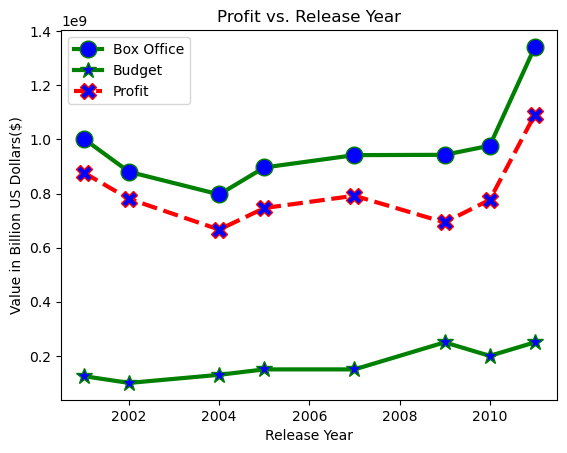

In [8]:
#which harry potter films made the most money?
# plotting the points
plt.plot(df_movies["Release Year"],df_movies["Box Office"], color='green', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.plot(df_movies["Release Year"],df_movies["Budget"], color='green', linewidth = 3,
         marker='*', markerfacecolor='blue', markersize=12) 
plt.plot(df_movies["Release Year"],df_movies["Profit"], color='red', linestyle='dashed', linewidth = 3,
         marker='X', markerfacecolor='blue', markersize=12) 
 
# naming the x axis
plt.xlabel('Release Year')
# naming the y axis
plt.ylabel('Value in Billion US Dollars($)')
 
# giving a title to my graph
plt.title('Profit vs. Release Year')
 
# function to show the plot
plt.legend(["Box Office", "Budget","Profit"], loc ="upper left")
plt.show()

In [9]:
df_movies.shape

(8, 7)

In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      8 non-null      int64 
 1   Movie Title   8 non-null      object
 2   Release Year  8 non-null      int64 
 3   Runtime       8 non-null      int64 
 4   Budget        8 non-null      int32 
 5   Box Office    8 non-null      int32 
 6   Profit        8 non-null      int32 
dtypes: int32(3), int64(3), object(1)
memory usage: 480.0+ bytes


In [11]:
df_movies.dtypes

Movie ID         int64
Movie Title     object
Release Year     int64
Runtime          int64
Budget           int32
Box Office       int32
Profit           int32
dtype: object

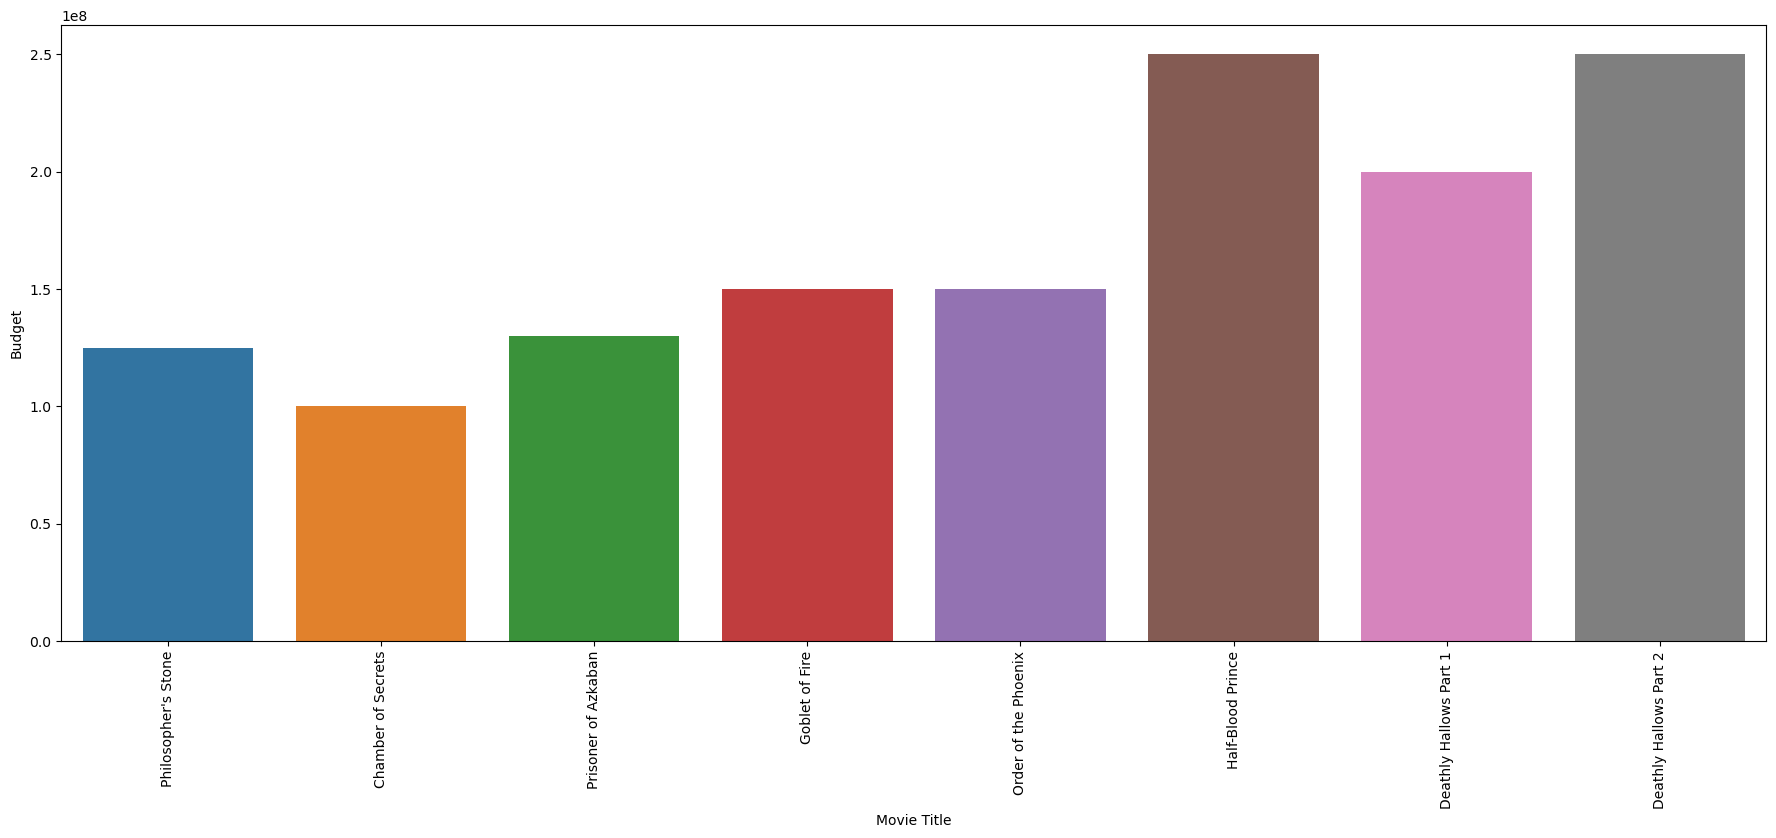

In [12]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Budget", data=df_movies)
plt.xticks(rotation=90)
plt.show()

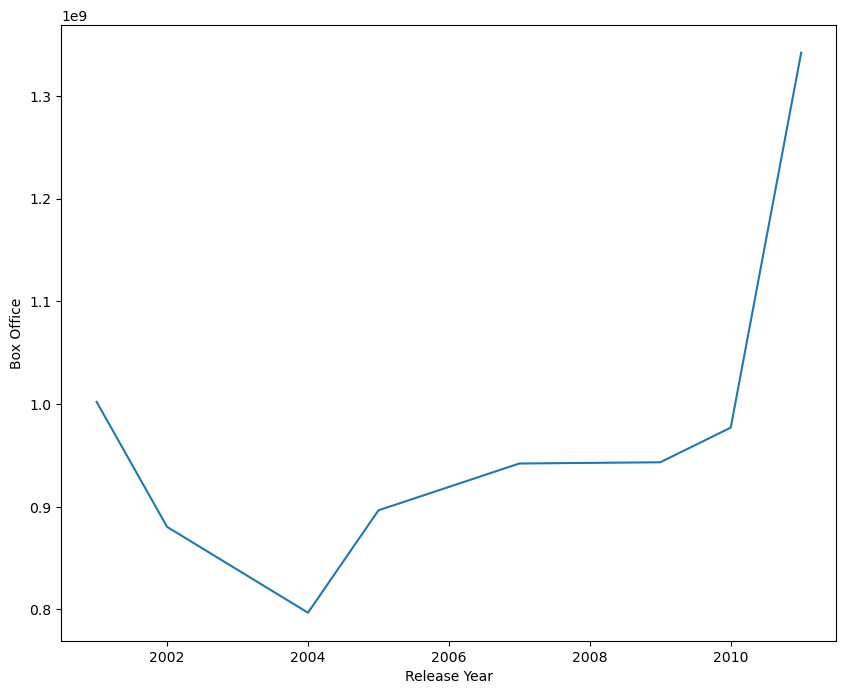

In [13]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Release Year', y='Box Office', data=df_movies)
plt.show()

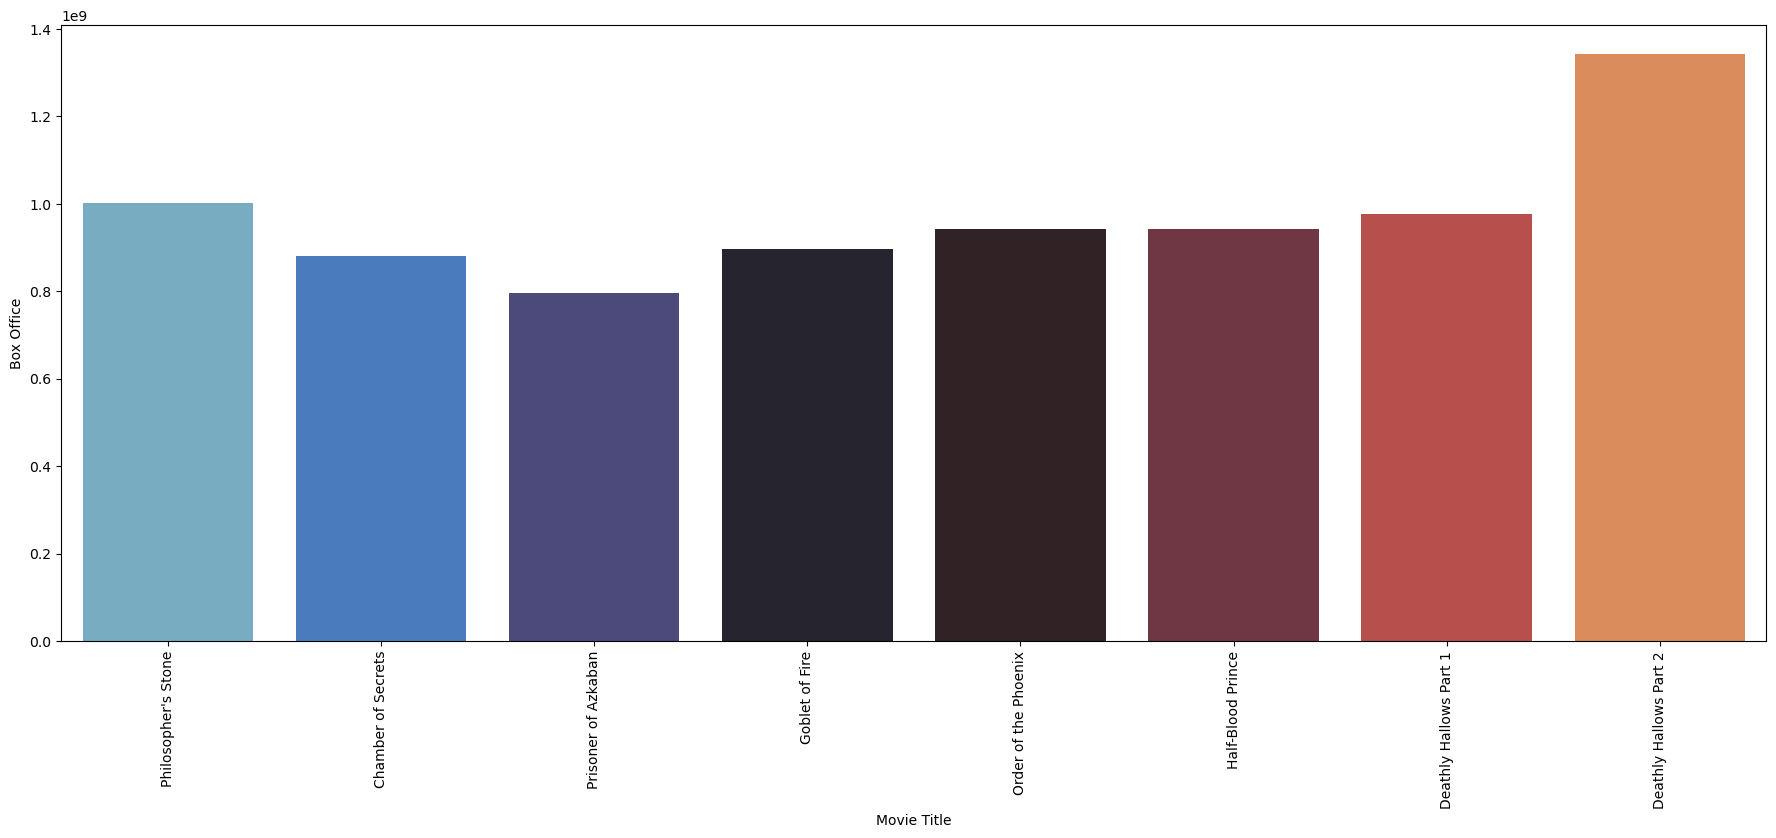

In [14]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Box Office", data=df_movies, palette='icefire')
plt.xticks(rotation=90)
plt.show()

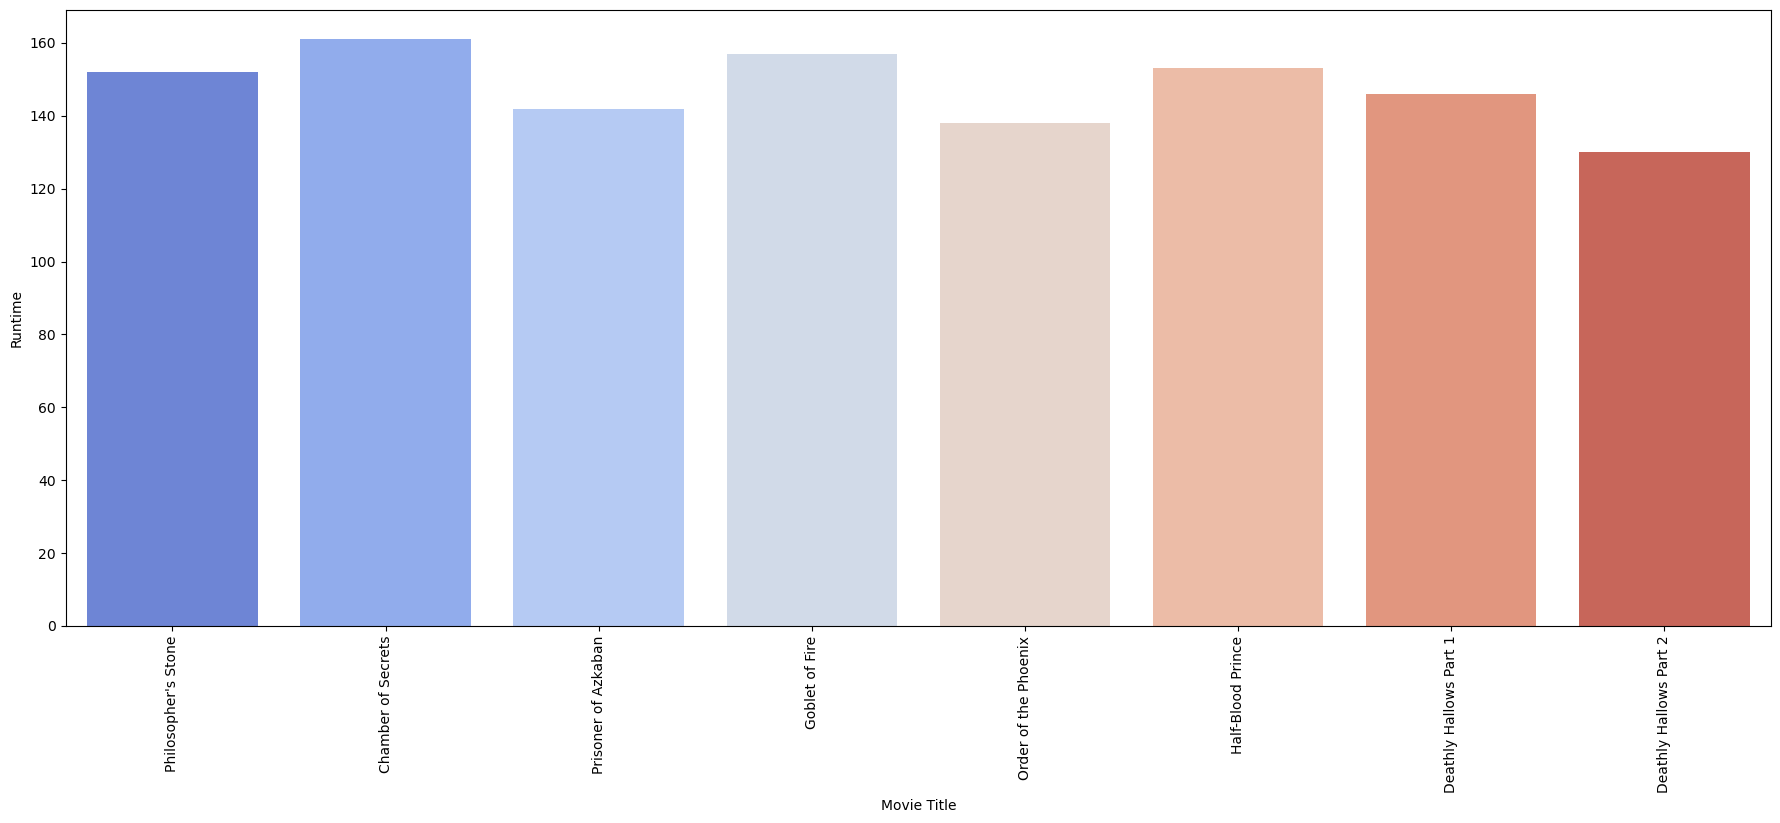

In [15]:
plt.figure(figsize=(22,8))
sns.barplot(x="Movie Title", y="Runtime", data=df_movies, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Common Functions should be  here
def bar_plot(df, x, column, ax, color):
    """ BAR PLOT """
    ax = df.plot.bar(x=x,
                    y=column,
                    ax=ax,
                    color=color,
                    legend=False)
    ax.set_title(column, fontsize=16)
    
def pie_chart(df, x, column, ax, color):
    """ PIE CHART """
    count_classes = df[x].value_counts()
    n_classes = len(count_classes)
    explode = (0.1,) * n_classes # explode for 0.1 each slice
    ax = df.plot.pie(x=x, 
                     y=column, 
                     ax=ax, 
                     colors=color, 
                     legend=False, 
                     explode=explode,
                     shadow=True)
    ax.set_title(column, fontsize=16)
    
def pie_chart_string(df, column, ax, color):
    """ PIE CHART FOR STRING VALUES """
    count_classes = df[column].value_counts()
    n_classes = len(count_classes)
    explode = (0.05,) * n_classes # explode for 0.1 each slice
    ax = df[column].value_counts().plot(kind='pie', 
                                        ax=ax, 
                                        colors=color, 
                                        explode=explode,
                                        shadow=True)
    ax.set_title(column, fontsize=16)
    
def bar_plot_string(df, column, ax, color):
    """ BAR PLOT FOR STRING VALUES """
    ax = df[column].value_counts().plot(kind='bar', 
                                        ax=ax, 
                                        color=color)
    ax.set_title(column, fontsize=16)   

In [17]:
color1=plt.cm.autumn(np.linspace(0,1,len(df_movies)))
color2=plt.cm.summer_r(np.linspace(0, 1, len(df_movies)))
color3=plt.cm.winter_r(np.linspace(0, 1, len(df_movies)))

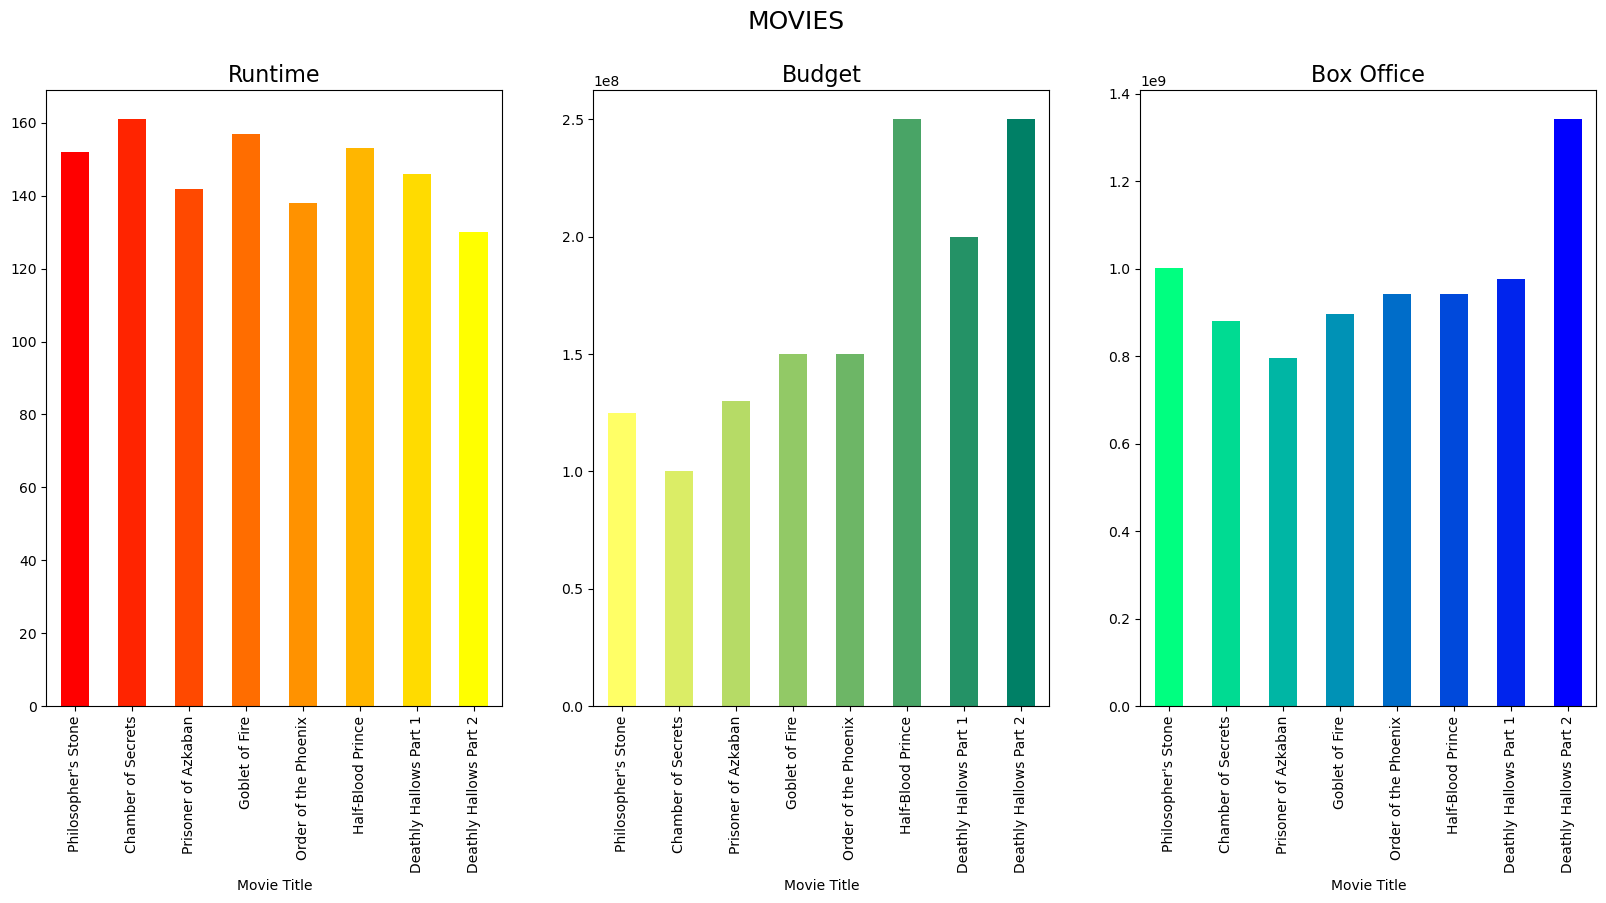

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
plt.suptitle("MOVIES", fontsize=18)
bar_plot(df_movies, "Movie Title", "Runtime", axes[0], color1)
bar_plot(df_movies, "Movie Title", "Budget", axes[1], color2)
bar_plot(df_movies, "Movie Title", "Box Office", axes[2],color3)
plt.show()

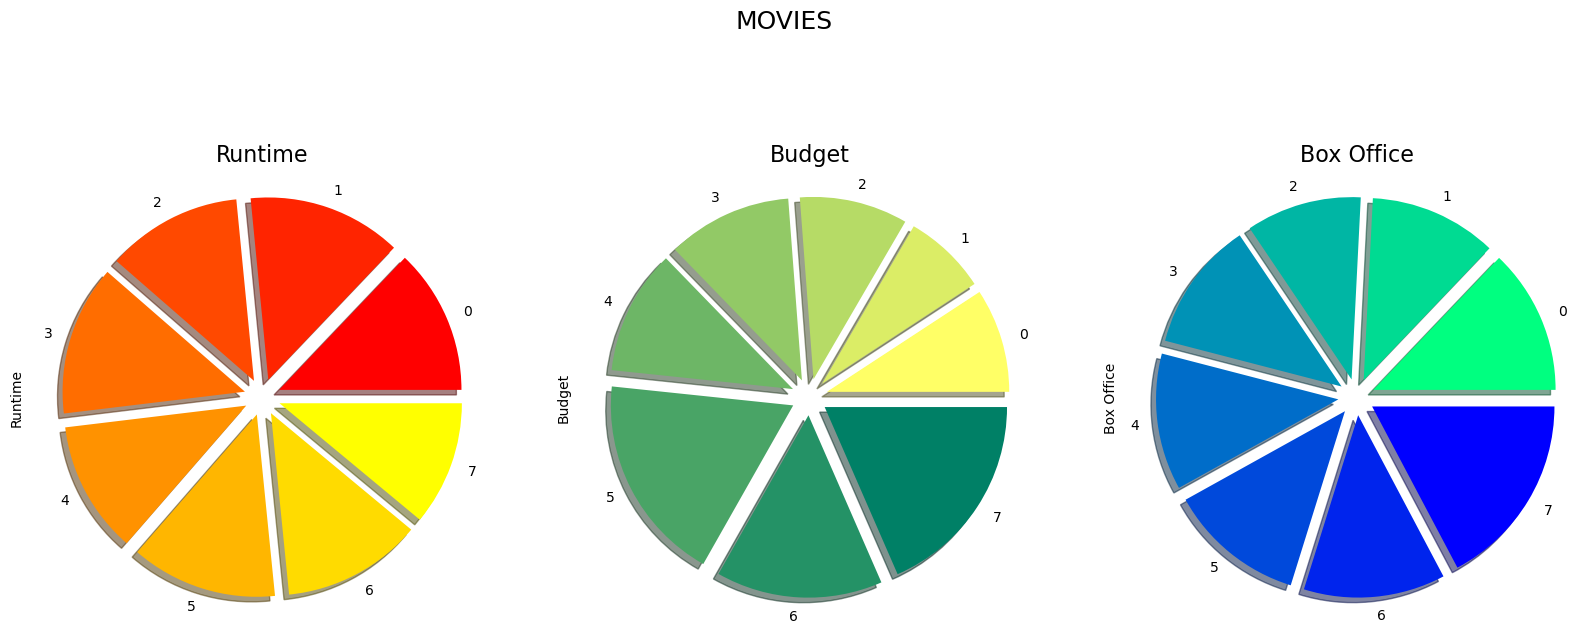

In [19]:
#also we can represent this data via pie chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
plt.suptitle("MOVIES", fontsize=18)
pie_chart(df_movies, "Movie Title", "Runtime", axes[0], color1)
pie_chart(df_movies, "Movie Title", "Budget", axes[1], color2)
pie_chart(df_movies, "Movie Title", "Box Office", axes[2],color3)
plt.show()

### CHARACTERS

In [20]:
df_characters.head(2)

Character ID Character Name Species Gender       House  \
0             1   Harry Potter   Human   Male  Gryffindor   
1             2    Ron Weasley   Human   Male  Gryffindor   

               Patronus Wand (Wood)      Wand (Core)  
0                  Stag       Holly  Phoenix Feather  
1  Jack Russell Terrier         NaN              NaN

In [21]:
#data cleaning
df_characters.isnull().sum()

Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

In [22]:
df_characters=df_characters[["Character Name", "Species", "Gender", "House"]]
df_characters.describe(include='all')

Character Name Species Gender       House
count             166     125    125          75
unique            166      13      3           6
top      Harry Potter   Human   Male  Gryffindor
freq                1     104     82          31

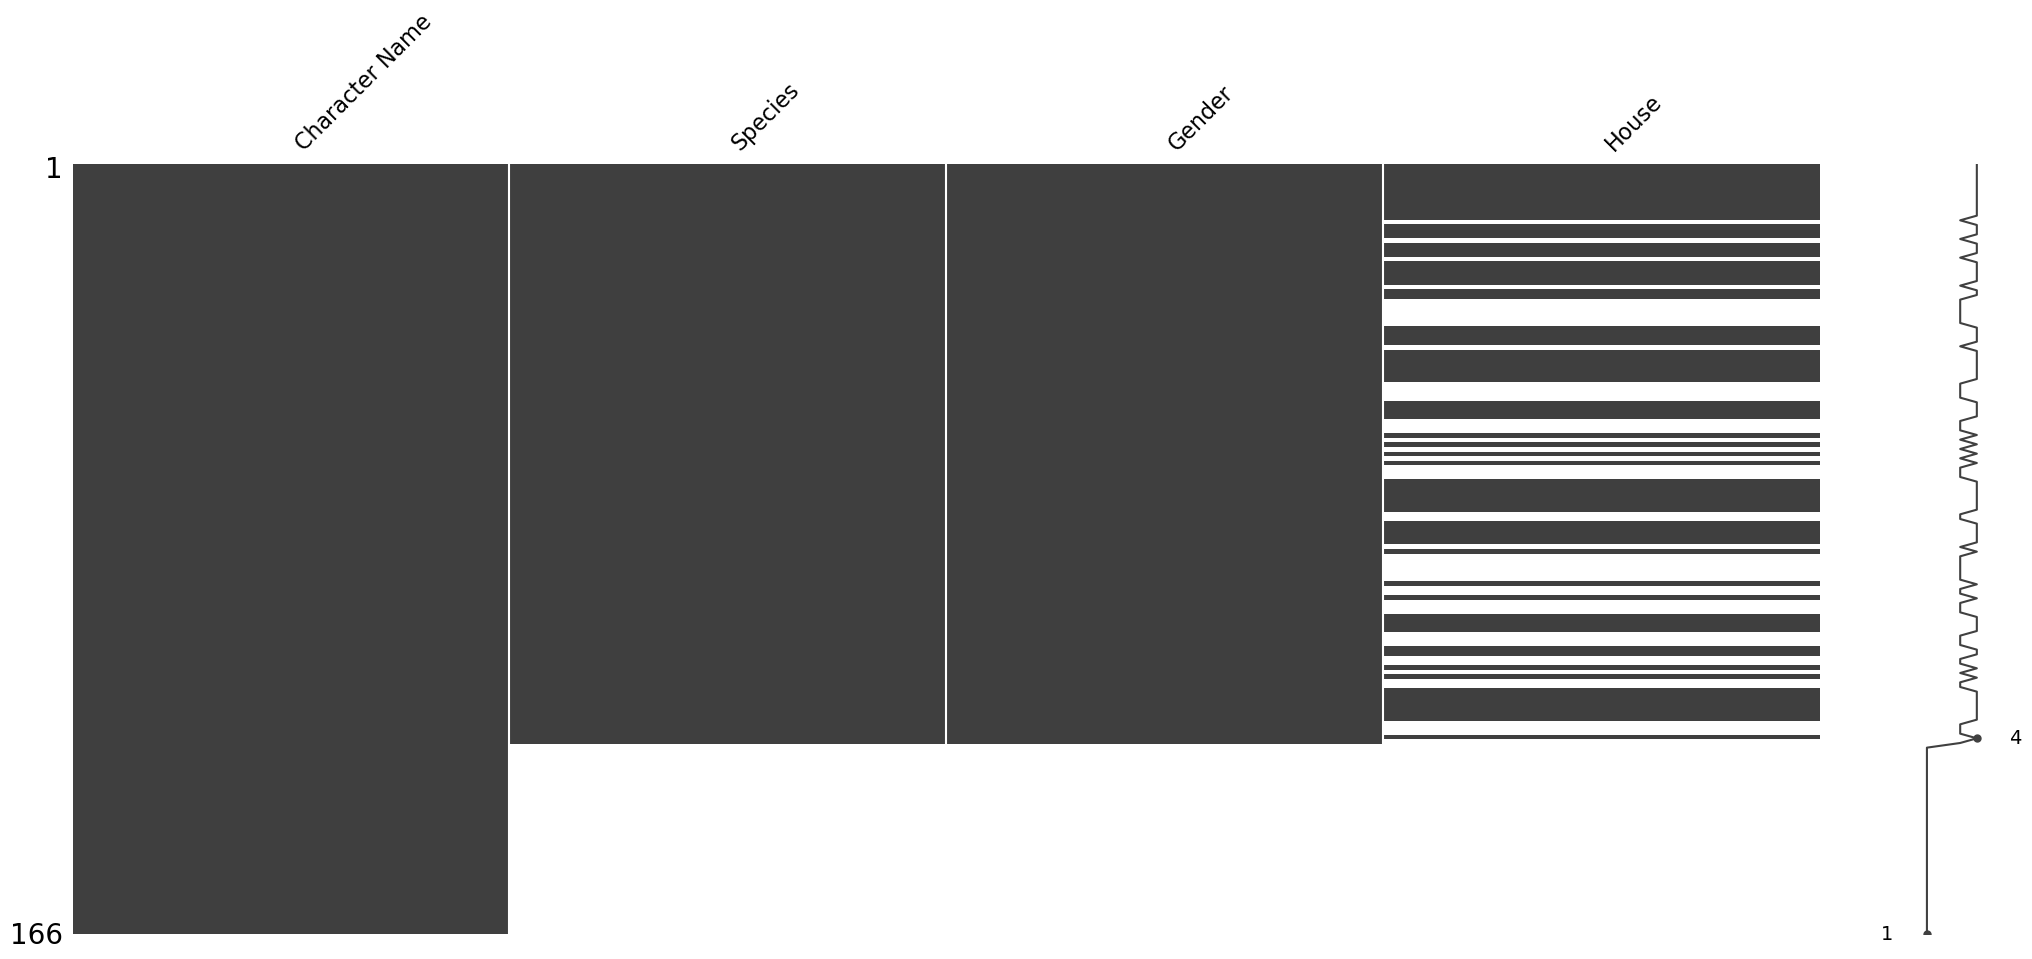

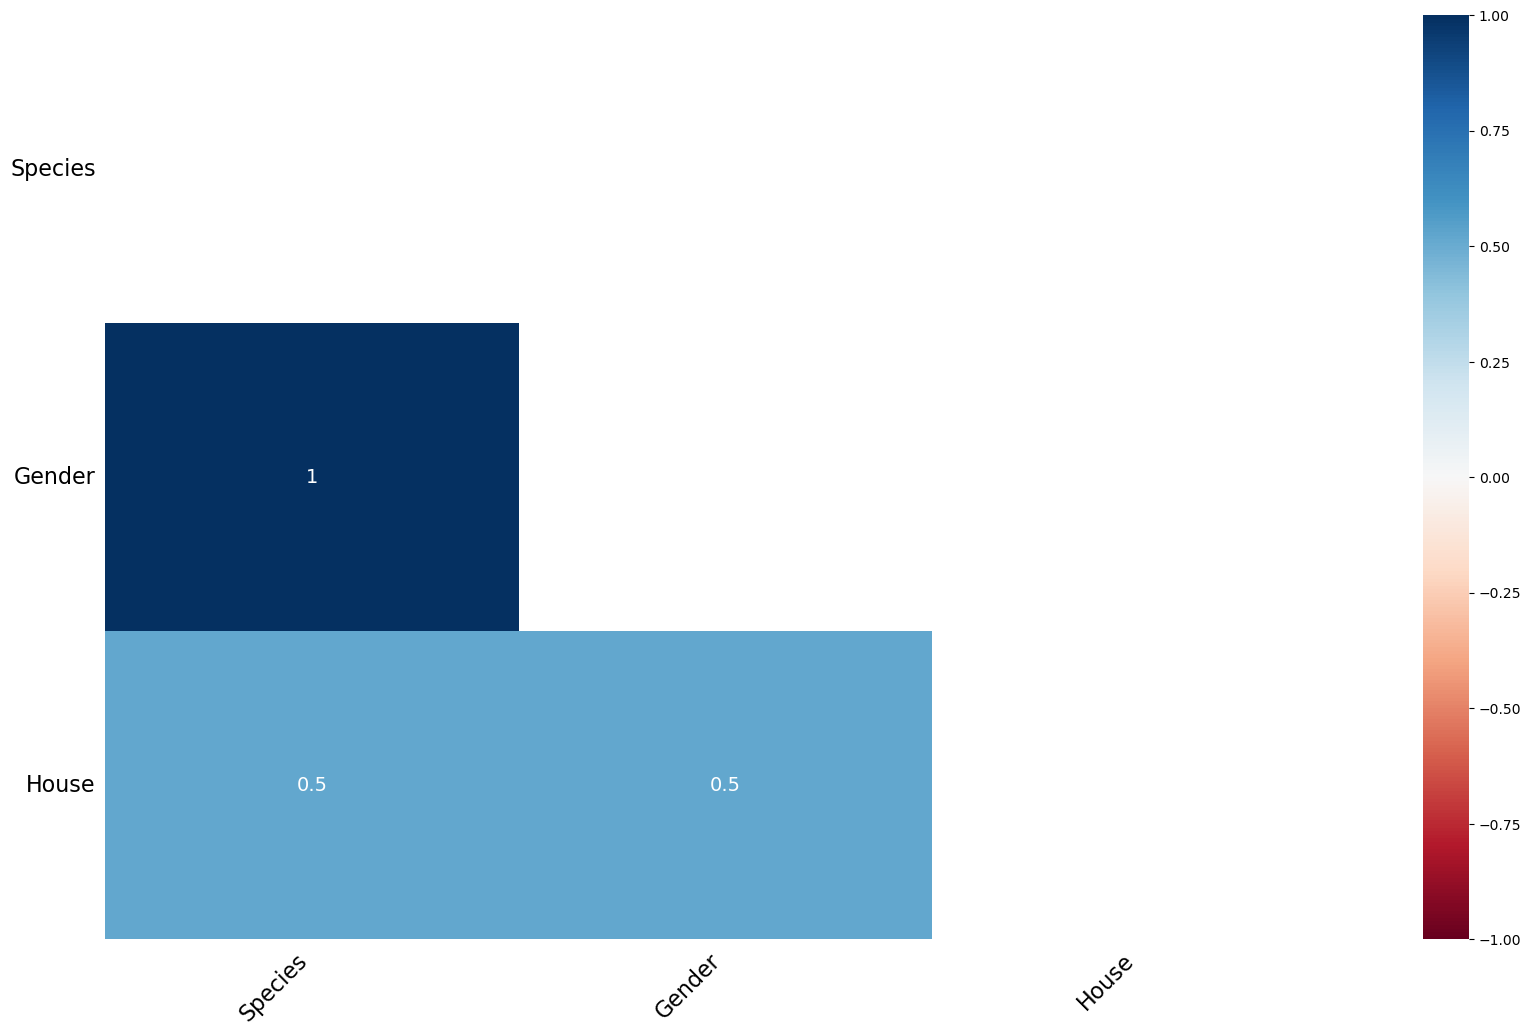

In [23]:
#visualizing missing values in dataset
#Program to visualizing mmissing values in dataset
#Imporitng the libraries
import missingno as msno
#visualize missing values as a matrix
msno.matrix(df_characters)
#visualize the correlation betweeb the number of
#missing values in different columns as a heatmap
msno.heatmap(df_characters);

A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

##### Remove Missing Entries


In [24]:
df_characters=df_characters.dropna(subset=['Gender', 'Species'], axis=0)
df_characters

Character Name                Species  Gender       House
0          Harry Potter                  Human    Male  Gryffindor
1           Ron Weasley                  Human    Male  Gryffindor
2      Hermione Granger                  Human  Female  Gryffindor
3      Albus Dumbledore                  Human    Male  Gryffindor
4         Rubeus Hagrid  Half-Human/Half-Giant    Male  Gryffindor
..                  ...                    ...     ...         ...
120     Charity Burbage                  Human  Female         NaN
121       Dilys Derwent                  Human  Female         NaN
122       Eldred Worple                  Human    Male         NaN
123        Marcus Belby                  Human    Male   Ravenclaw
124  Mykew Gregorovitch                  Human    Male         NaN

[125 rows x 4 columns]

In [25]:
#Descriptive Statistics
df_characters = df_characters[["Character Name", "Species", "Gender","House"]]
df_characters.describe(include='all')

Character Name Species Gender       House
count             125     125    125          75
unique            125      13      3           6
top      Harry Potter   Human   Male  Gryffindor
freq                1     104     82          31

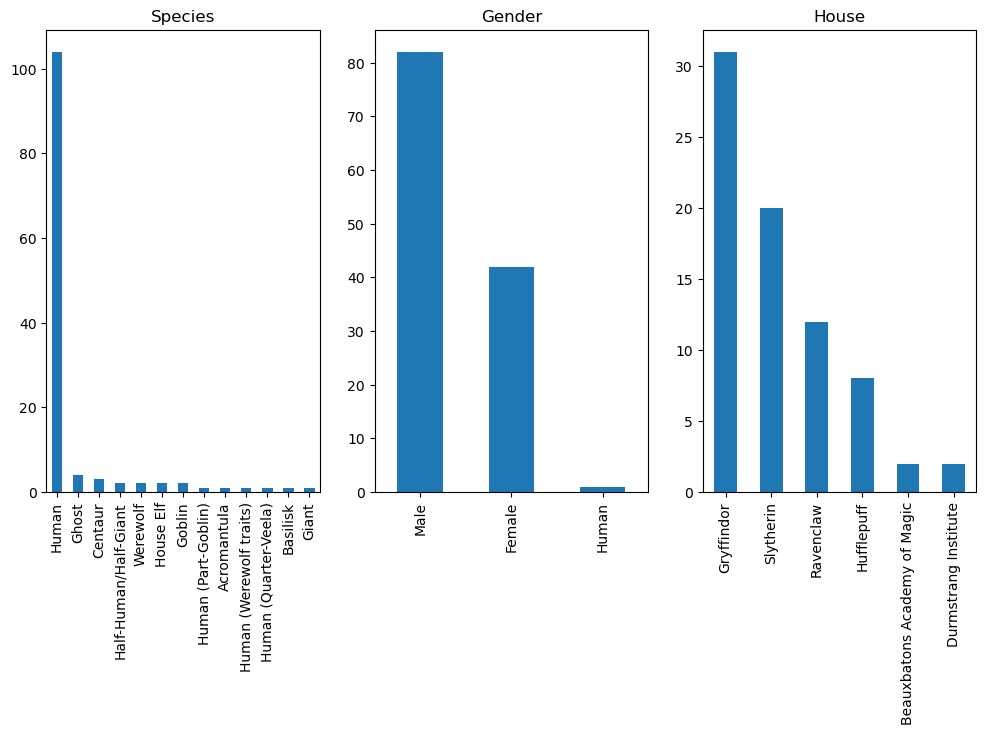

In [26]:
#data visualization
plt.rcParams["figure.figsize"] = [12.0, 6.0]
categorical_features = ["Species", "Gender","House"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_characters[categorical_features]):
    df_characters[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

[Text(0.5, 1.0, 'Distribution of Houses'), Text(0.5, 0, 'Student count')]

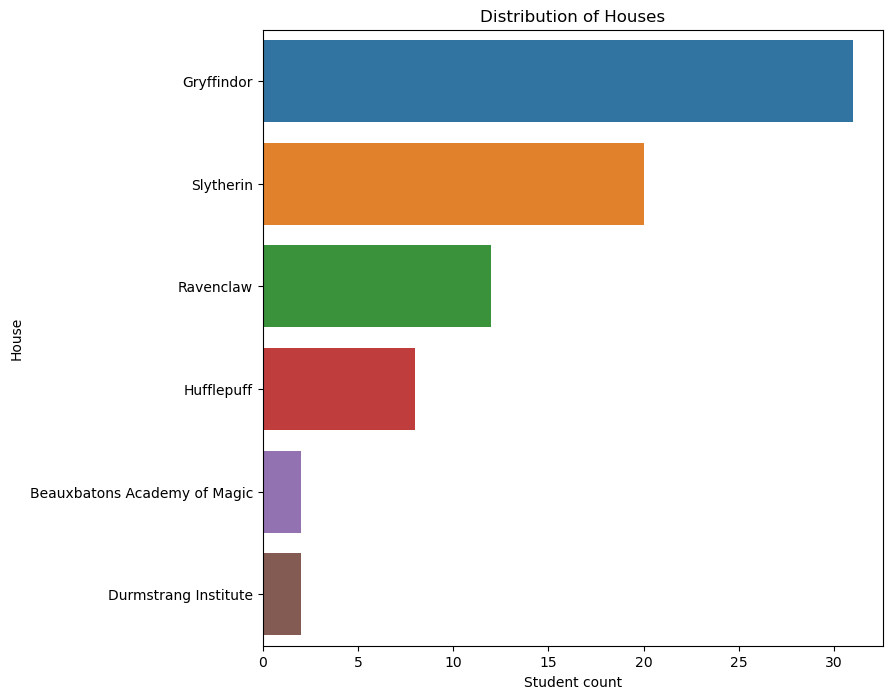

In [27]:
plt.figure(figsize=(8,8))
sns.countplot(data=df_characters, y ='House').set(title='Distribution of Houses', xlabel = 'Student count')

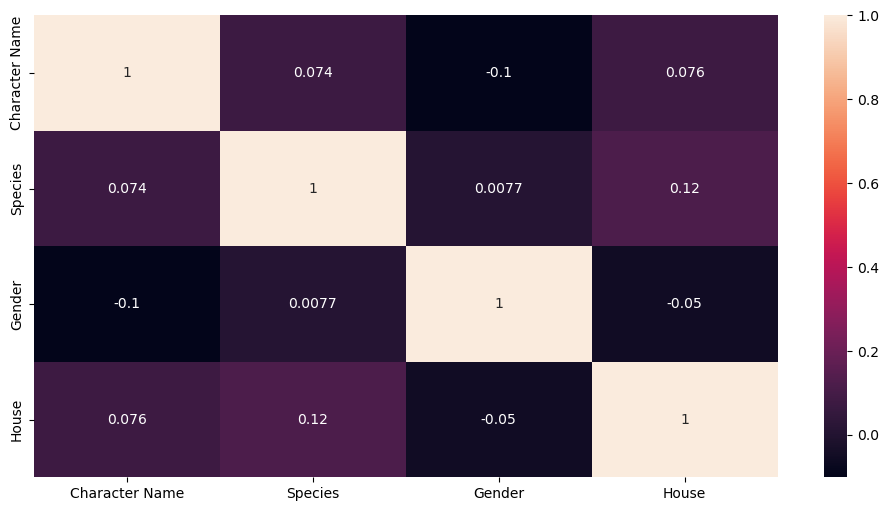

In [28]:
df_characters=df_characters[["Character Name","Species" ,"Gender" ,"House"]]
cols = ["Character Name","Species" ,"Gender" ,"House"]
df_characters[["Species","House","Character Name","Gender"]]=df_characters[["Species","House","Character Name","Gender"]].astype('category')
df_characters["Species"]=df_characters["Species"].cat.codes
df_characters["Character Name"]=df_characters["Character Name"].cat.codes
df_characters["Gender"]=df_characters["Gender"].cat.codes
df_characters["House"]=df_characters["House"].cat.codes


corrMatrix = df_characters.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

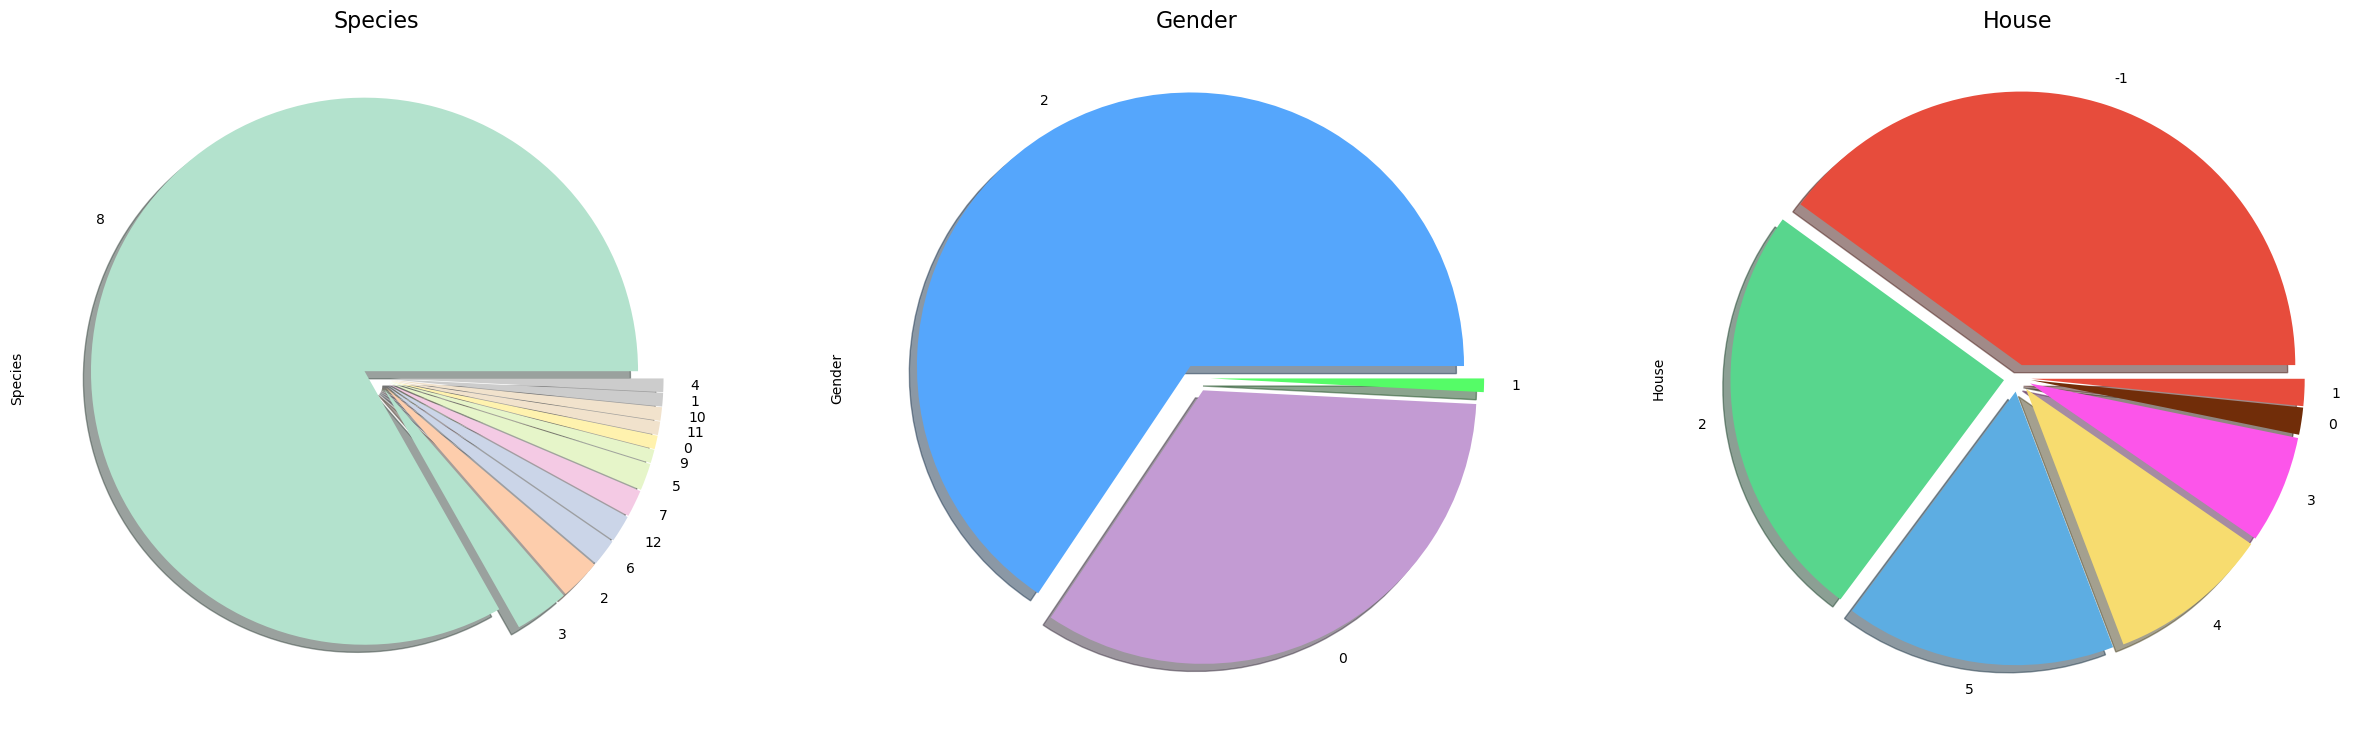

In [29]:
#let's do some pie charts
color1 = plt.cm.Pastel2(np.linspace(0, 1, len(df_characters["Species"].value_counts())))
color2 = ["#55A6FC", "#C39BD3", "#55FC67"]
color3 = ["#E74C3C", "#58D68D", "#5DADE2", "#F7DC6F", "#FC55EA", "#712D09"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,35))
pie_chart_string(df_characters, "Species", axes[0], color1)
pie_chart_string(df_characters, "Gender", axes[1], color2)
pie_chart_string(df_characters, "House", axes[2], color3)
plt.show()

In [30]:
df_characters.isnull().sum()

Character Name    0
Species           0
Gender            0
House             0
dtype: int64

In [31]:
df_characters.shape

(125, 4)

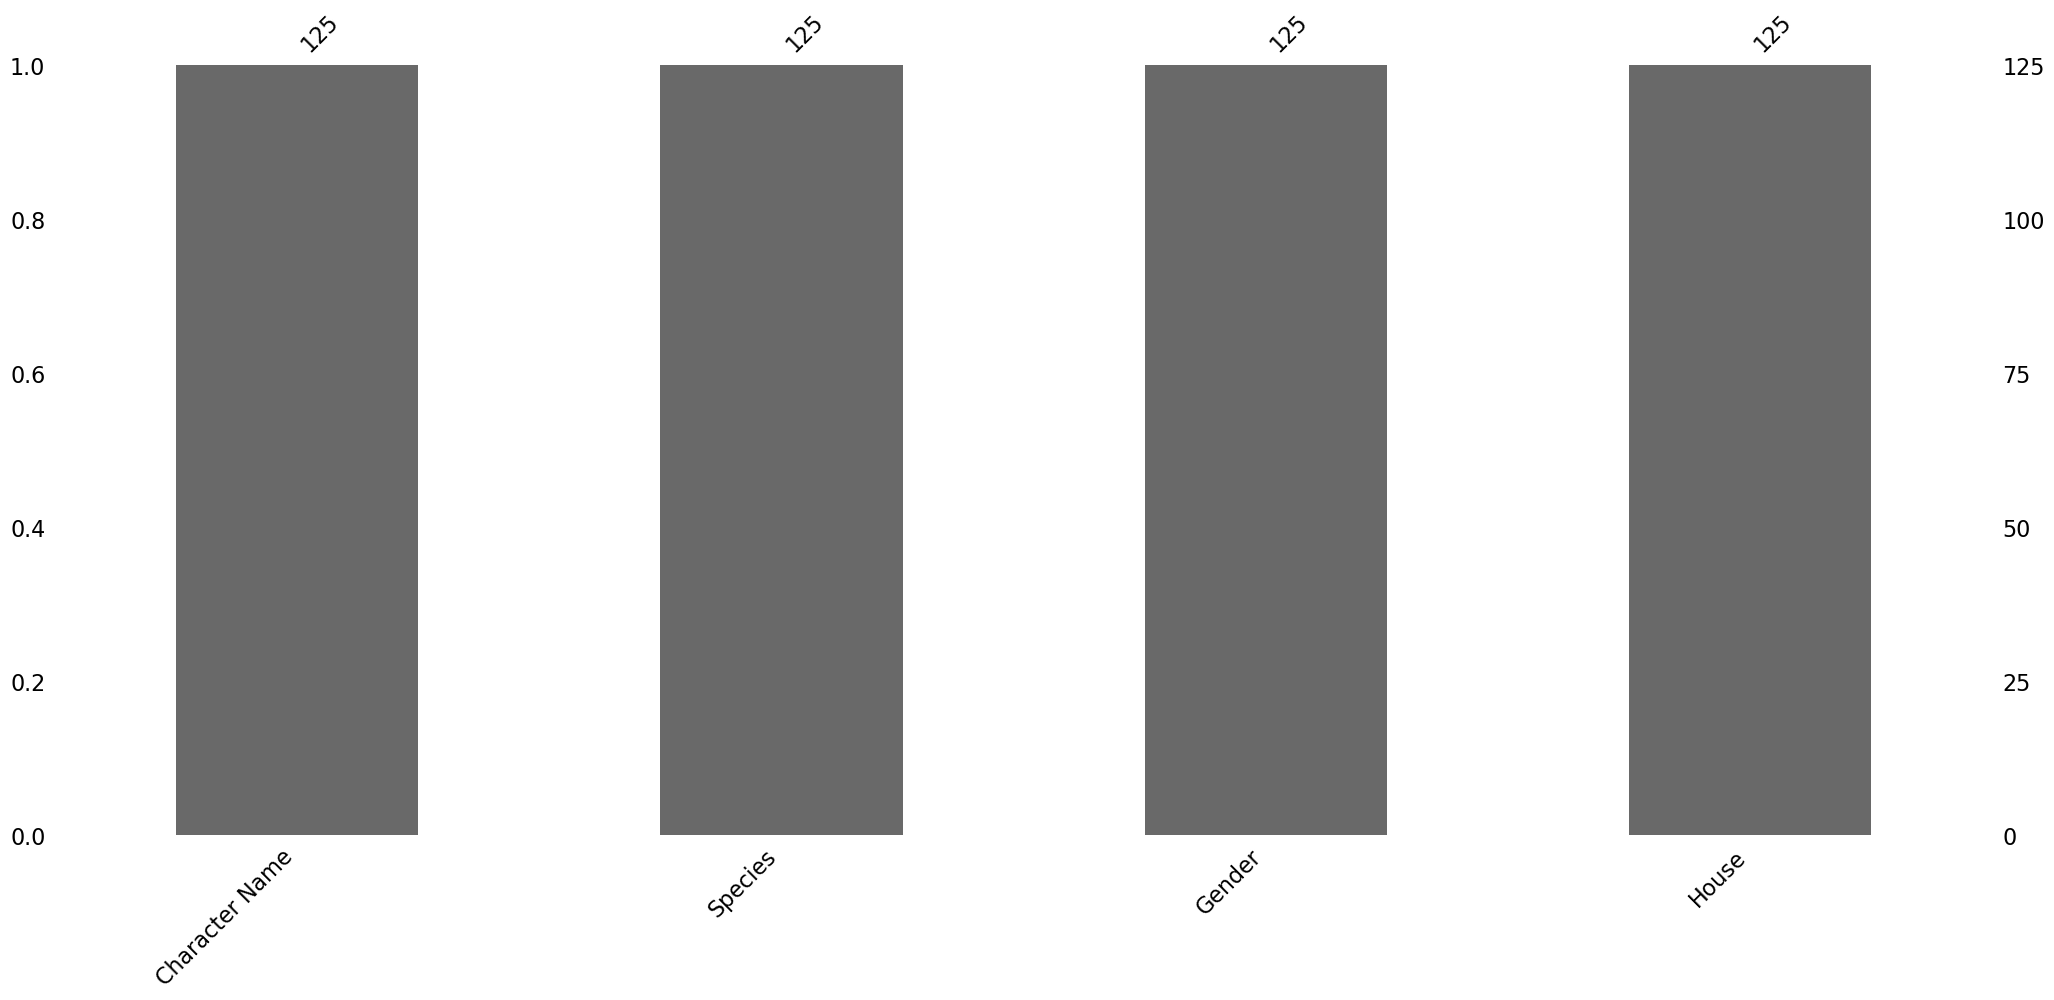

In [32]:
msno.bar(df_characters)
plt.show()

In [33]:
df_characters.isnull().mean()*100 #check in percentages of missing values

Character Name    0.0
Species           0.0
Gender            0.0
House             0.0
dtype: float64

In [34]:
df_characters=df_characters.dropna()

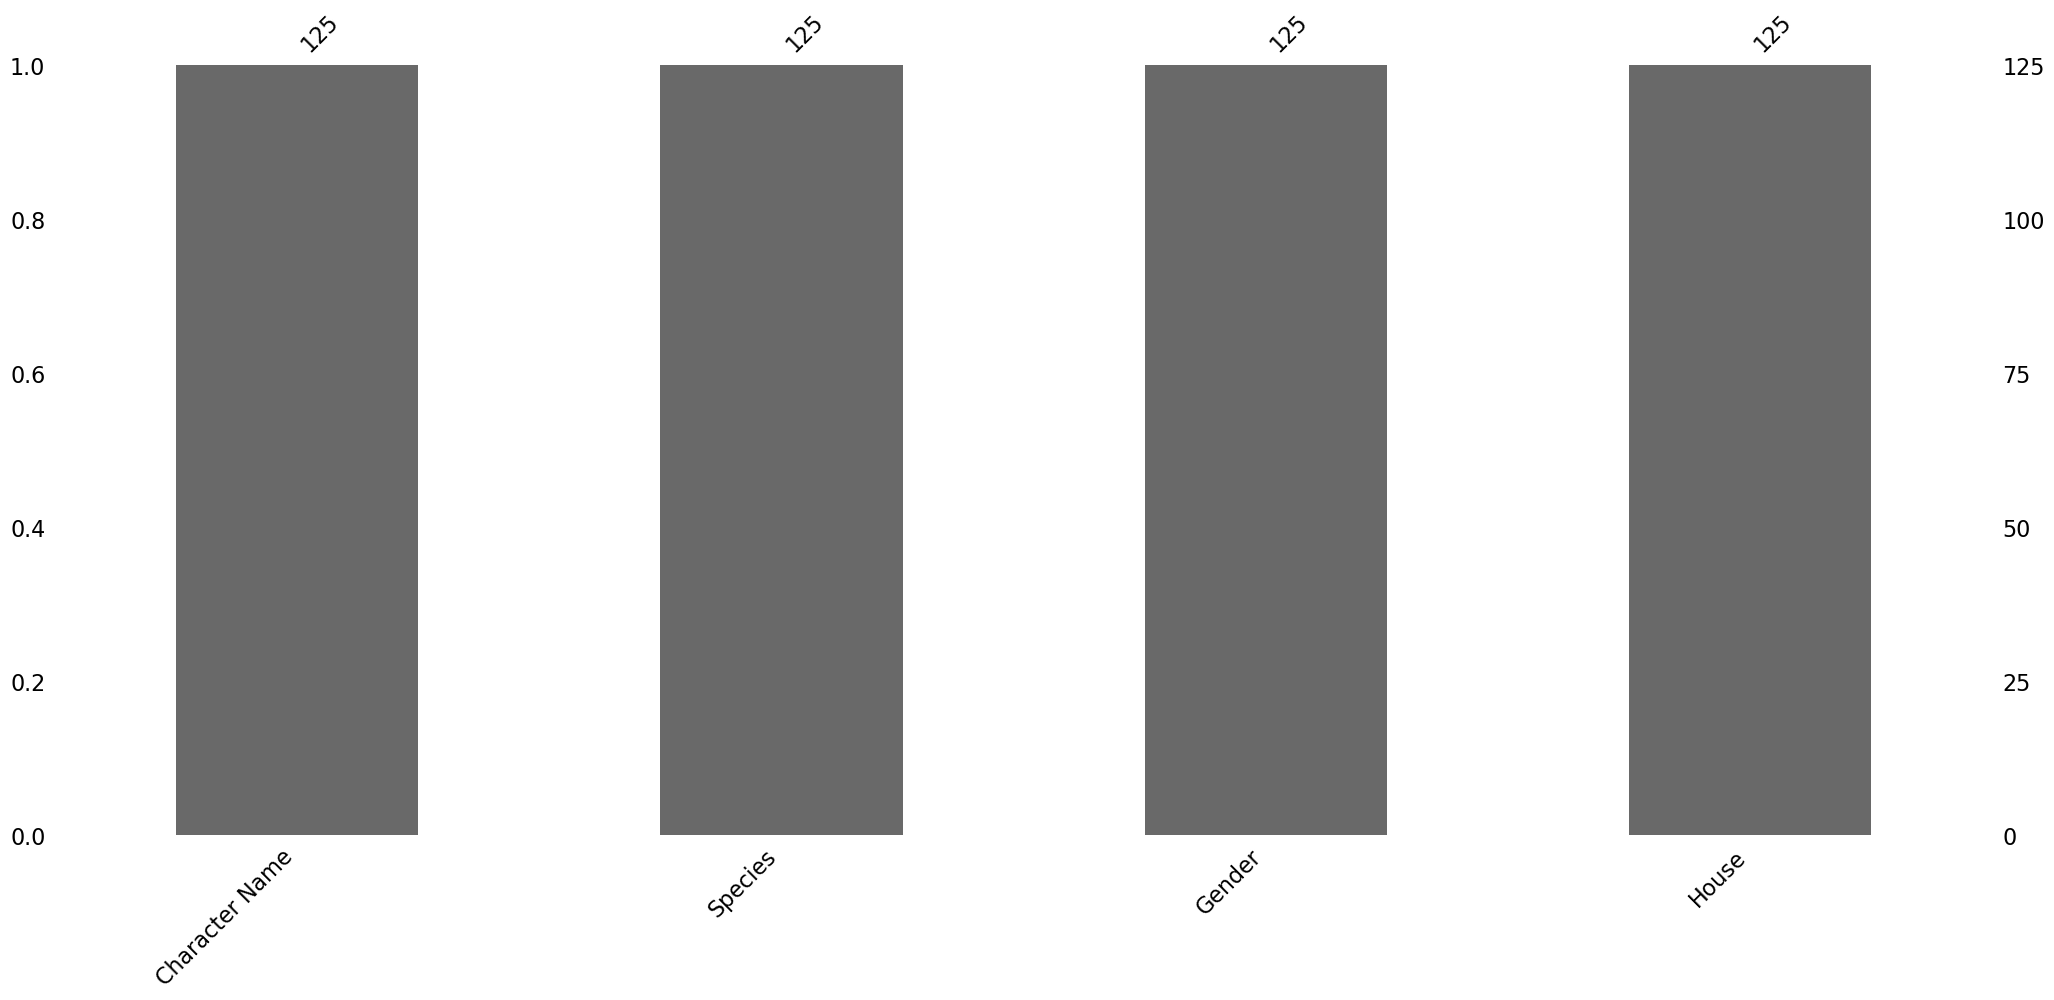

In [35]:
msno.bar(df_characters)
plt.show()

In [36]:
df_characters

Character Name  Species  Gender  House
0                51        8       2      2
1               104        8       2      2
2                53        8       0      2
3                 2        8       2      2
4               106        6       2      2
..              ...      ...     ...    ...
120              21        8       0     -1
121              28        8       0     -1
122              33        8       2     -1
123              68        8       2      4
124              81        8       2     -1

[125 rows x 4 columns]

In [37]:
df_characters.nunique()

Character Name    125
Species            13
Gender              3
House               7
dtype: int64

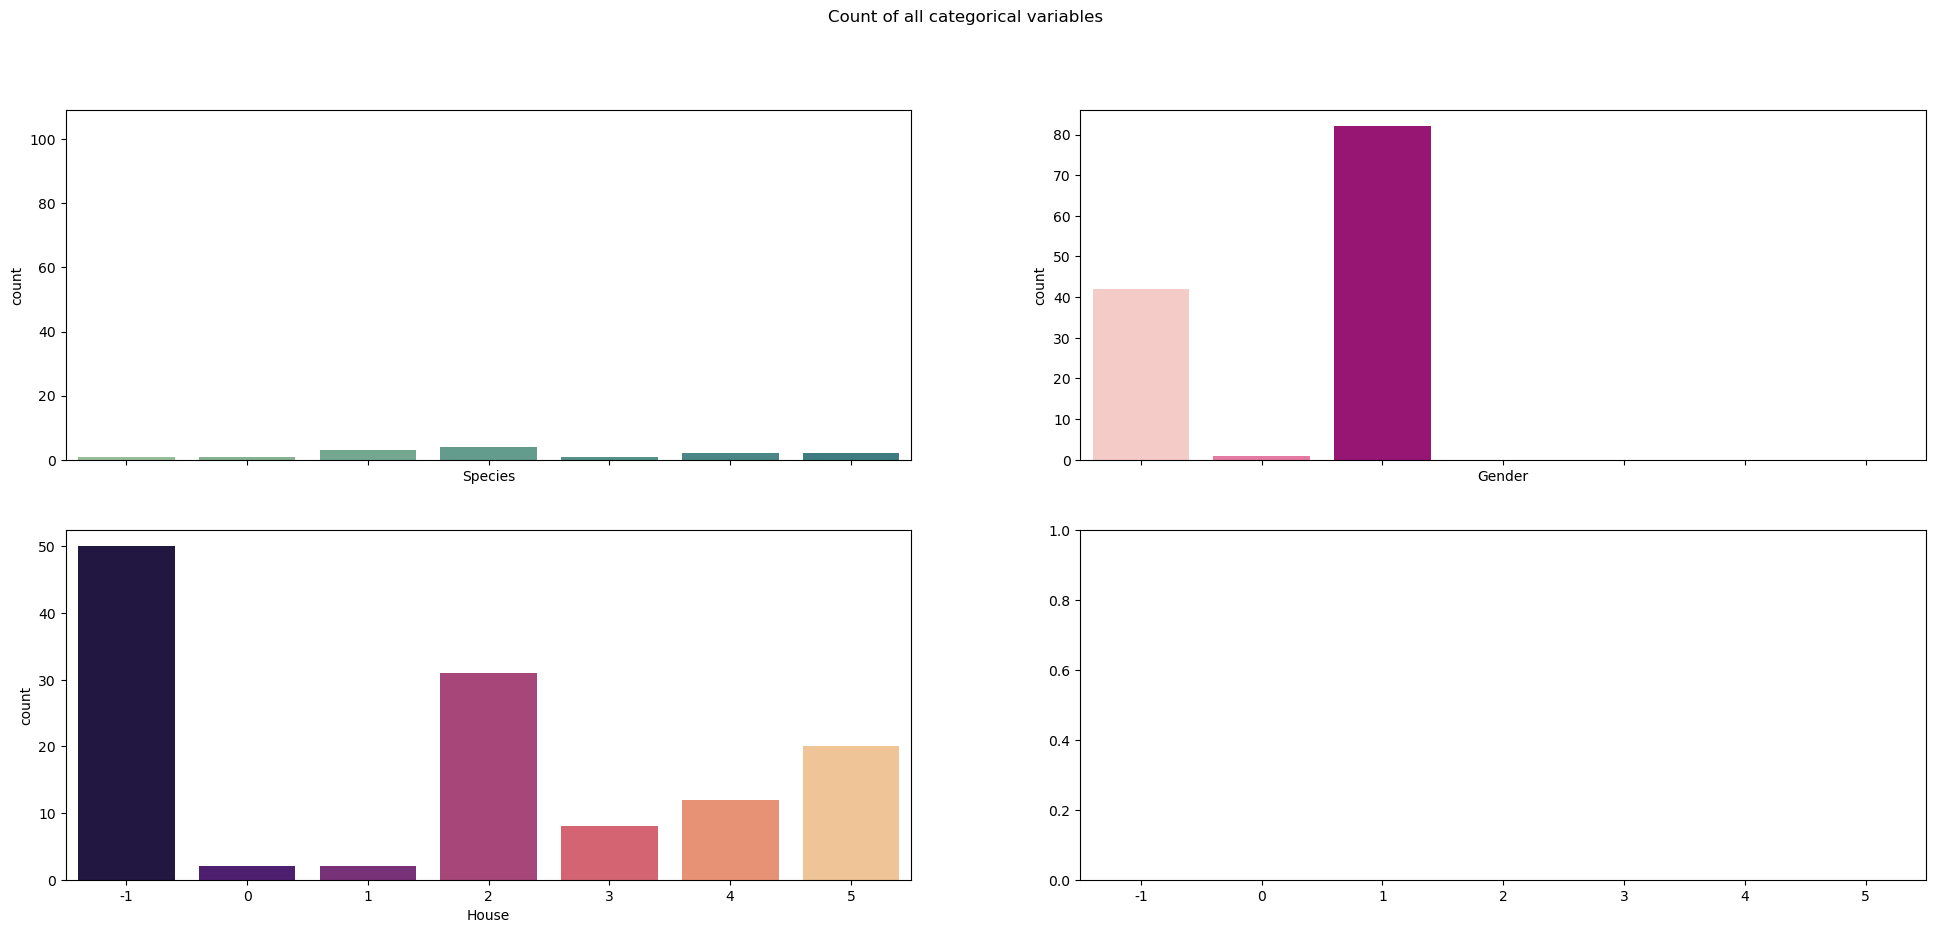

In [38]:
fig, axes = plt.subplots(2,2, sharex=True, figsize=(24,10))
fig.suptitle('Count of all categorical variables')
sns.countplot(ax=axes[0,0], data=df_characters, x='Species', palette='crest')
sns.countplot(ax=axes[0,1], data=df_characters,x='Gender', palette='RdPu')
sns.countplot(ax=axes[1,0], data=df_characters, x='House', palette='magma')
plt.show()

In [39]:
df_characters = pd.read_csv("Characters.csv", encoding='unicode_escape')

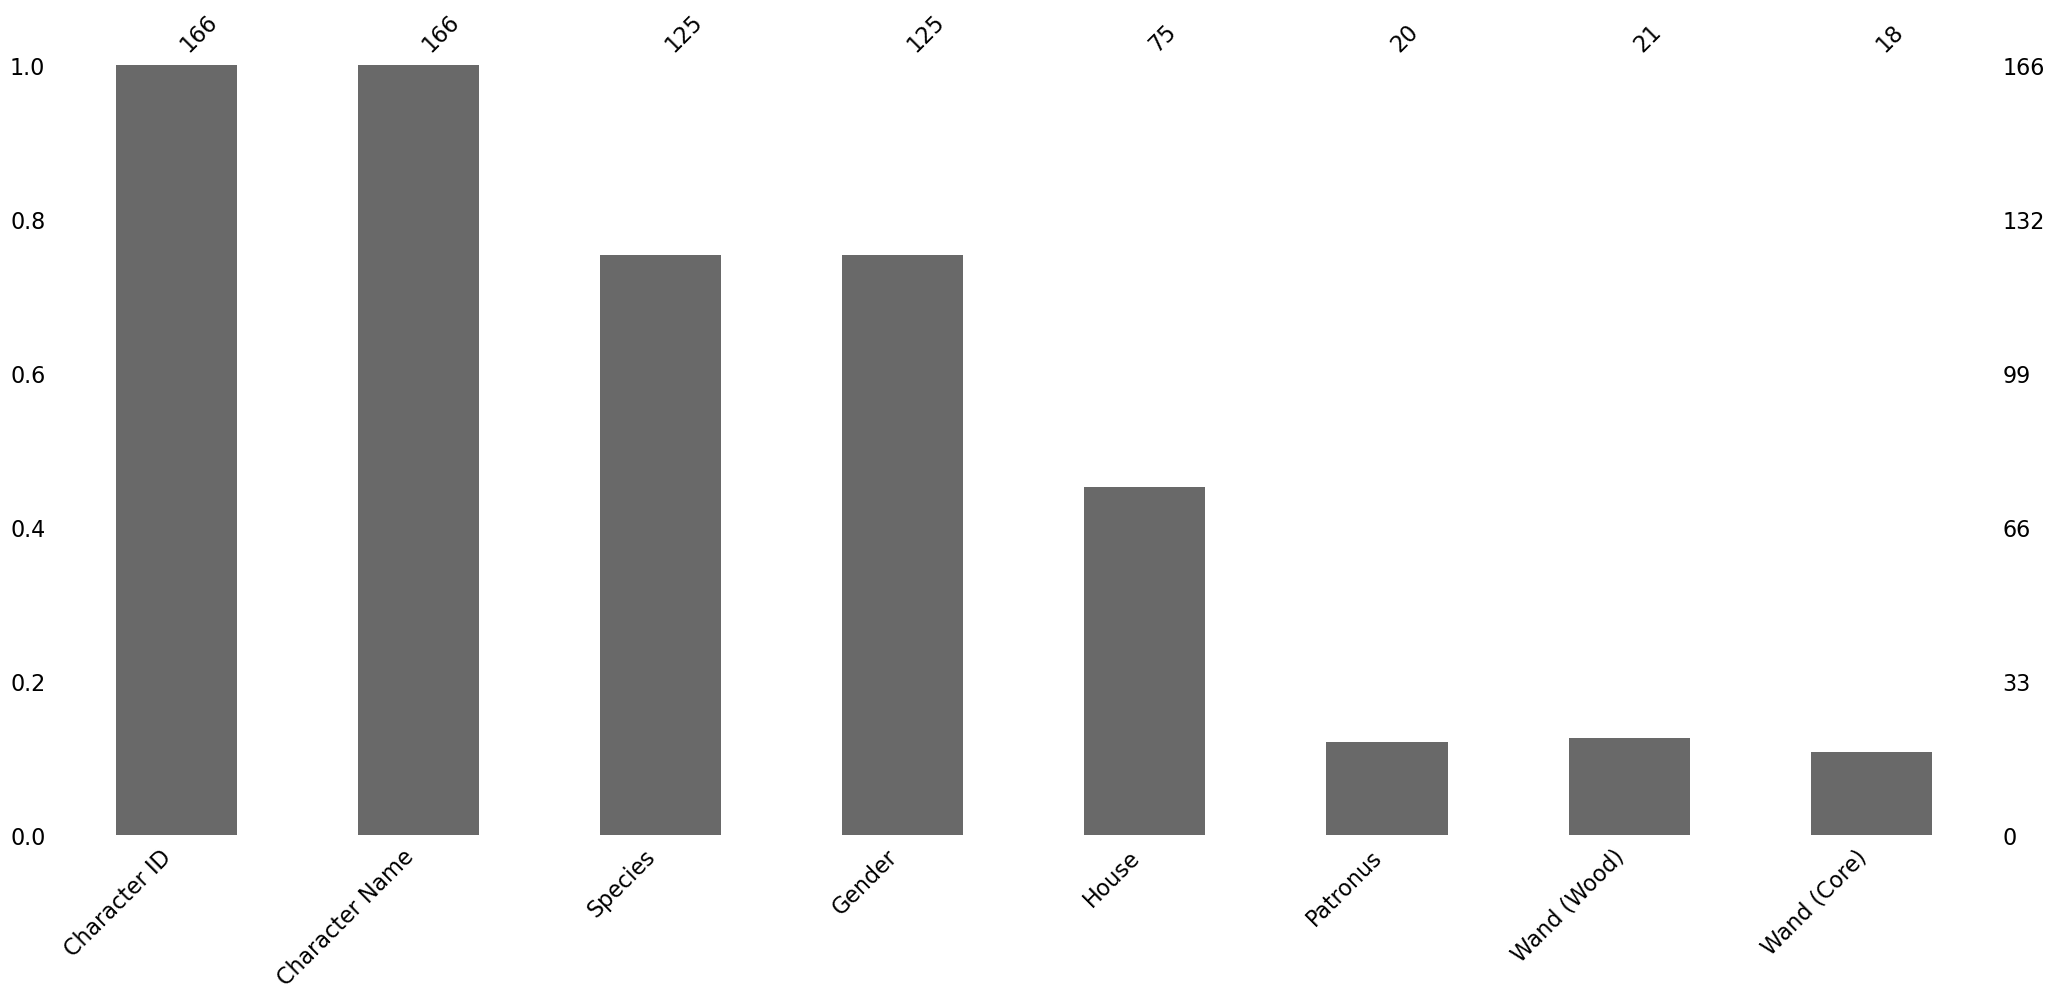

In [40]:
msno.bar(df_characters)
plt.show()

In [41]:
df_characters.isnull().mean()*100 # check in percentages of missing values.

Character ID       0.000000
Character Name     0.000000
Species           24.698795
Gender            24.698795
House             54.819277
Patronus          87.951807
Wand (Wood)       87.349398
Wand (Core)       89.156627
dtype: float64

In [42]:
df_characters=df_characters.drop(['Patronus', 'House', 'Wand (Wood)', 'Wand (Core)'], axis=1)

In [43]:
df_characters.isnull().sum()

Character ID       0
Character Name     0
Species           41
Gender            41
dtype: int64

In [44]:
df_characters=df_characters.drop('Character ID', axis=1)
df_characters.head()

Character Name                Species  Gender
0      Harry Potter                  Human    Male
1       Ron Weasley                  Human    Male
2  Hermione Granger                  Human  Female
3  Albus Dumbledore                  Human    Male
4     Rubeus Hagrid  Half-Human/Half-Giant    Male

In [45]:
df_characters['Gender'] = df_characters['Gender'].fillna(df_characters['Gender'].value_counts().idxmax())
df_characters['Species'] = df_characters['Species'].fillna(df_characters['Species'].value_counts().idxmax())

In [46]:
df_characters.isnull().sum()

Character Name    0
Species           0
Gender            0
dtype: int64

In [47]:
df_characters.shape

(166, 3)

In [48]:
df_characters.nunique()

Character Name    166
Species            13
Gender              3
dtype: int64

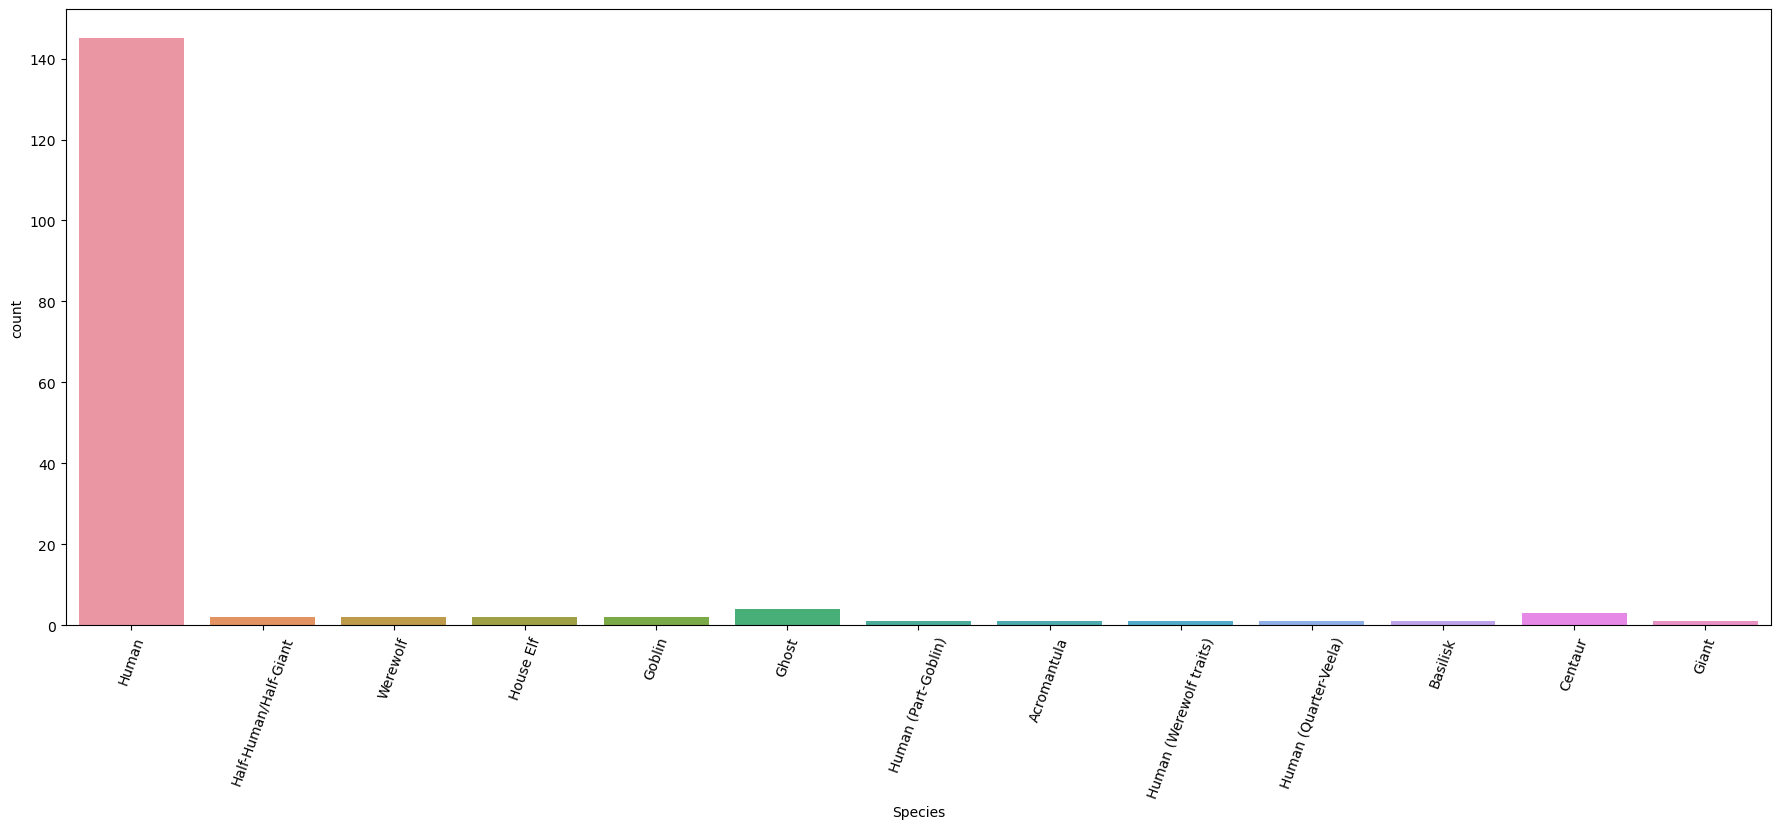

In [50]:
plt.figure(figsize=(22,8))
sns.countplot(x='Species',data = df_characters)
plt.xticks(rotation=70)
plt.show()

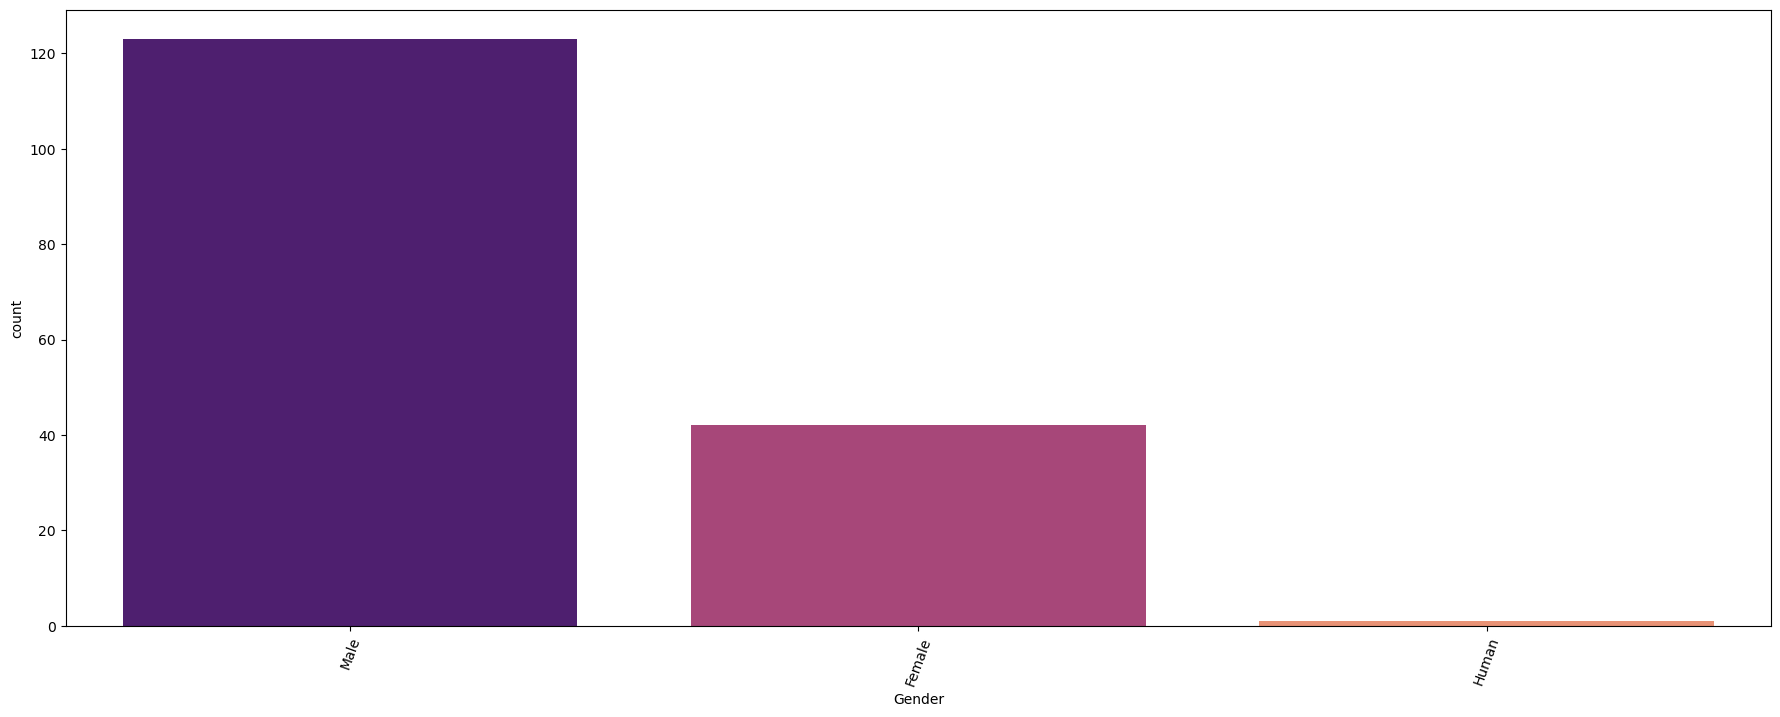

In [51]:
plt.figure(figsize=(22,8))
sns.countplot(x='Gender', data=df_characters, palette='magma')
plt.xticks(rotation=70)
plt.show()

In [52]:
df_characters.head(3)

Character Name Species  Gender
0      Harry Potter   Human    Male
1       Ron Weasley   Human    Male
2  Hermione Granger   Human  Female

In [53]:
harry = (df_characters.loc[df_characters['Character Name']=="Harry Potter"])
ron = (df_characters.loc[df_characters['Character Name']=="Ron Weasley"])
hermione = (df_characters.loc[df_characters['Character Name']=="Hermione Granger"])

In [54]:
harry

Character Name Species Gender
0   Harry Potter   Human   Male

In [55]:
ron

Character Name Species Gender
1    Ron Weasley   Human   Male

In [56]:
hermione

Character Name Species  Gender
2  Hermione Granger   Human  Female

<AxesSubplot:ylabel='count'>

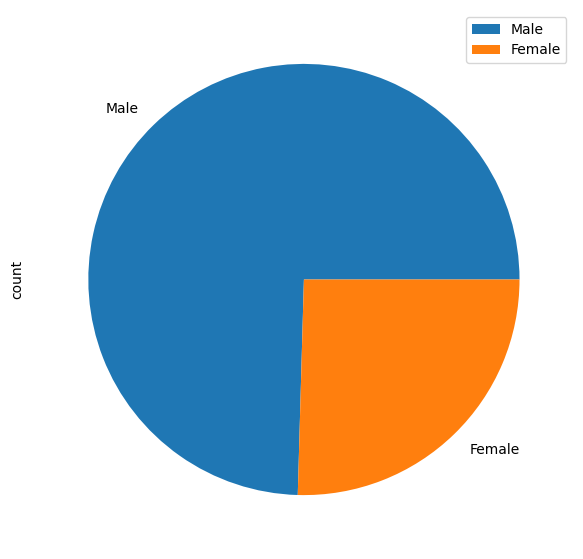

In [57]:
#genre of characters
g=df_characters['Gender'].value_counts().to_frame('count').rename_axis('Gender').reset_index()
g=g.loc[:1]#clearing wrong data
g.plot.pie(y='count',figsize=(7,7), labels=g['Gender'])

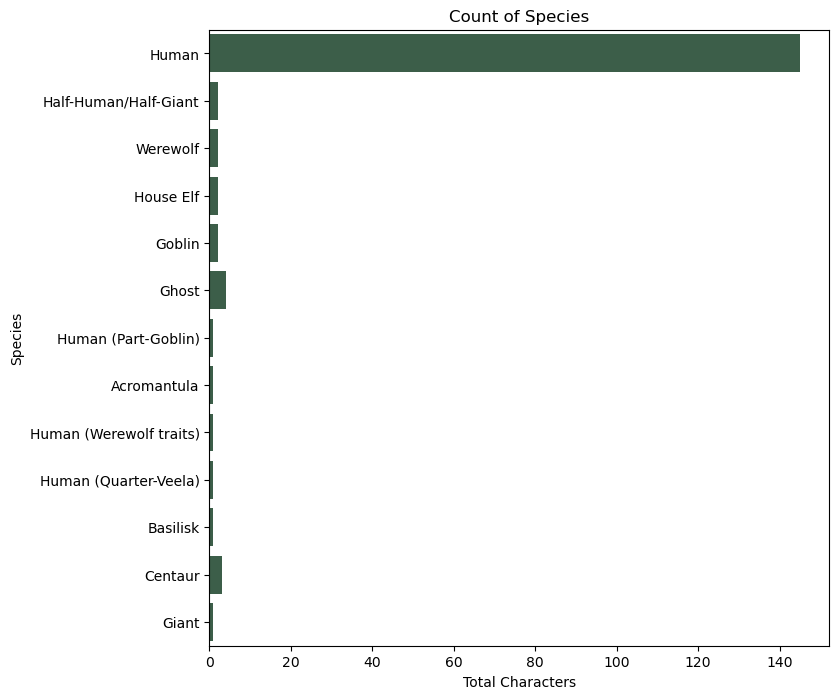

In [58]:
#what is the most common species in movies?

plt.figure(figsize=(8,8))
sns.countplot(data=df_characters, y='Species', color='#366447').set(title='Count of Species', xlabel='Total Characters');

### PLACES

In [59]:
df_places.head()

Place ID                Place Name Place Category
0         1         Flourish & Blotts   Diagon Alley
1         2  Gringotts Wizarding Bank   Diagon Alley
2         3           Knockturn Alley   Diagon Alley
3         4               Ollivanders   Diagon Alley
4         5        The Leaky Cauldron   Diagon Alley

In [60]:
df_places.describe(include='all')

Place ID         Place Name Place Category
count   74.000000                 74             74
unique        NaN                 74              5
top           NaN  Flourish & Blotts       Hogwarts
freq          NaN                  1             45
mean    37.500000                NaN            NaN
std     21.505813                NaN            NaN
min      1.000000                NaN            NaN
25%     19.250000                NaN            NaN
50%     37.500000                NaN            NaN
75%     55.750000                NaN            NaN
max     74.000000                NaN            NaN

In [61]:
df_places.shape

(74, 3)

In [62]:
df_places.isnull().sum()

Place ID          0
Place Name        0
Place Category    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

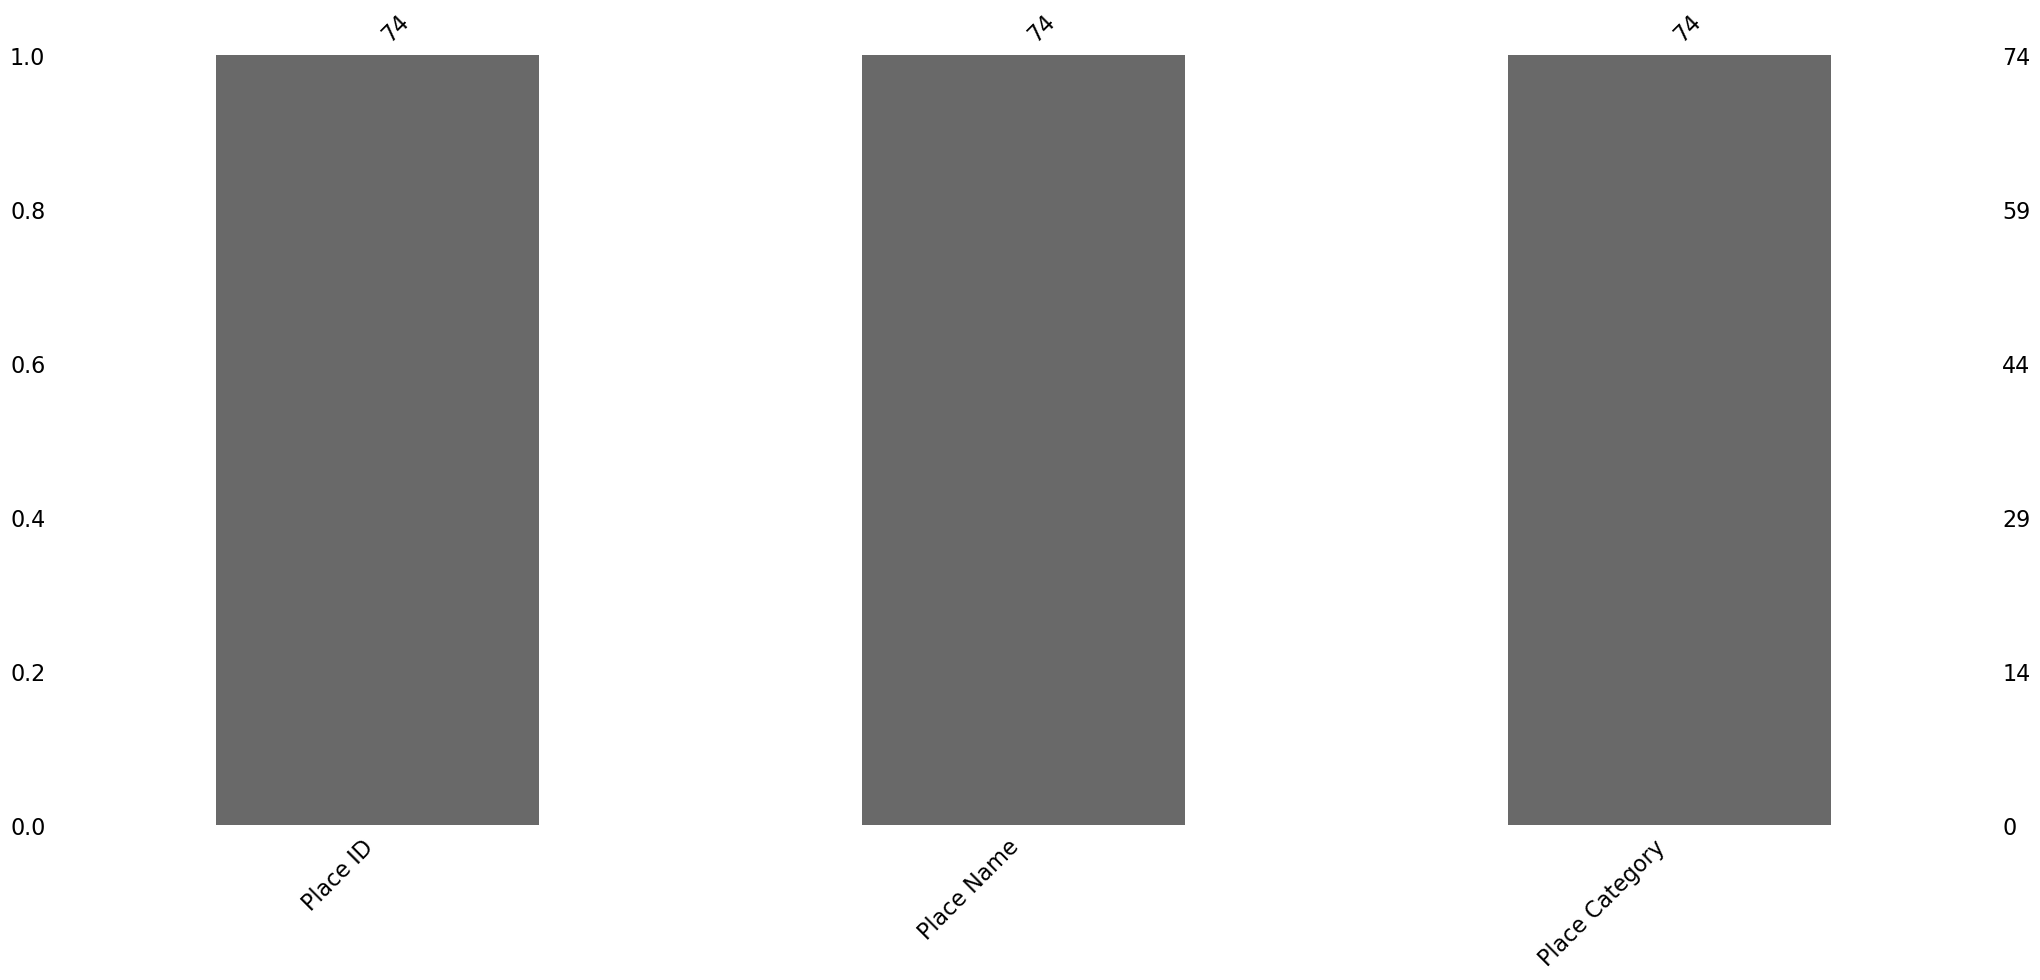

In [63]:
msno.bar(df_places)
plt.show

In [64]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place ID        74 non-null     int64 
 1   Place Name      74 non-null     object
 2   Place Category  74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [65]:
df_places.dtypes

Place ID           int64
Place Name        object
Place Category    object
dtype: object

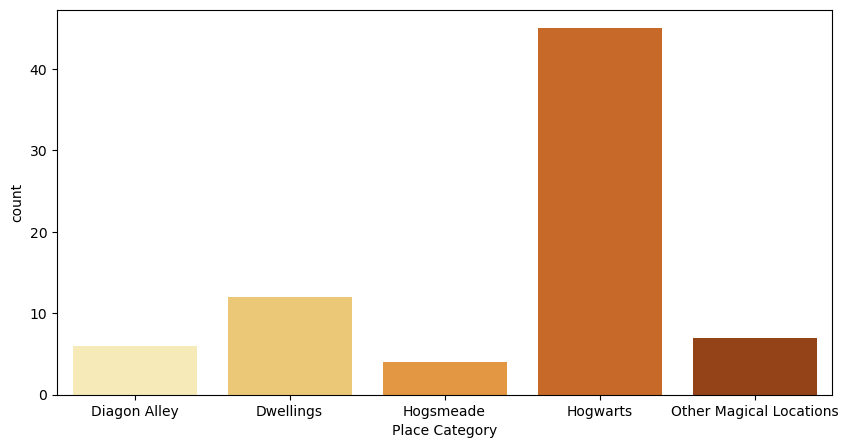

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='Place Category', data=df_places, palette='YlOrBr')
plt.show()

In [67]:
df_places=df_places.rename(columns={'Place Name' : 'place_name'}, inplace=False)

In [68]:
df_places.nunique()

Place ID          74
place_name        74
Place Category     5
dtype: int64

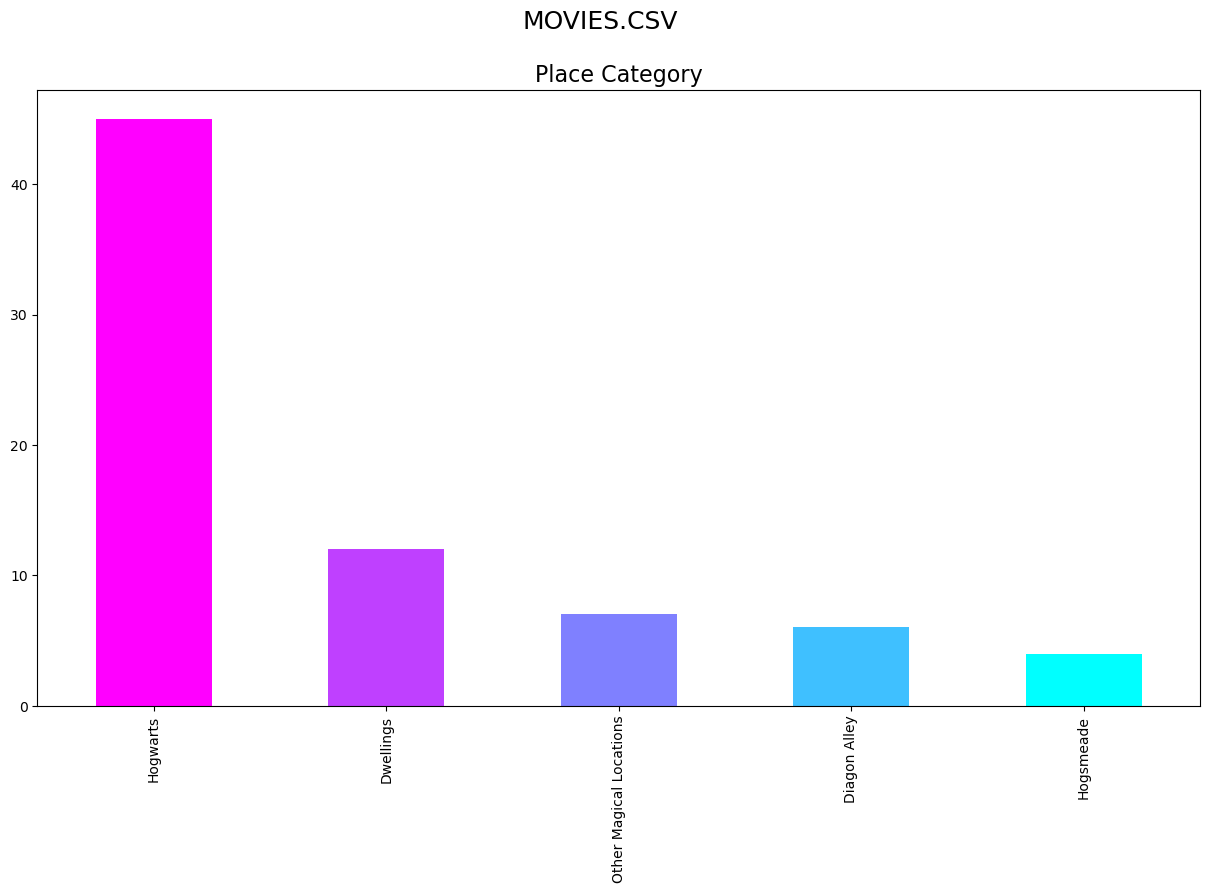

In [69]:
color1 = plt.cm.cool_r(np.linspace(0, 1, len(df_places["Place Category"].value_counts())))


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
plt.suptitle("MOVIES.CSV", fontsize=18) 
bar_plot_string(df_places, "Place Category", axes, color1)
plt.show()

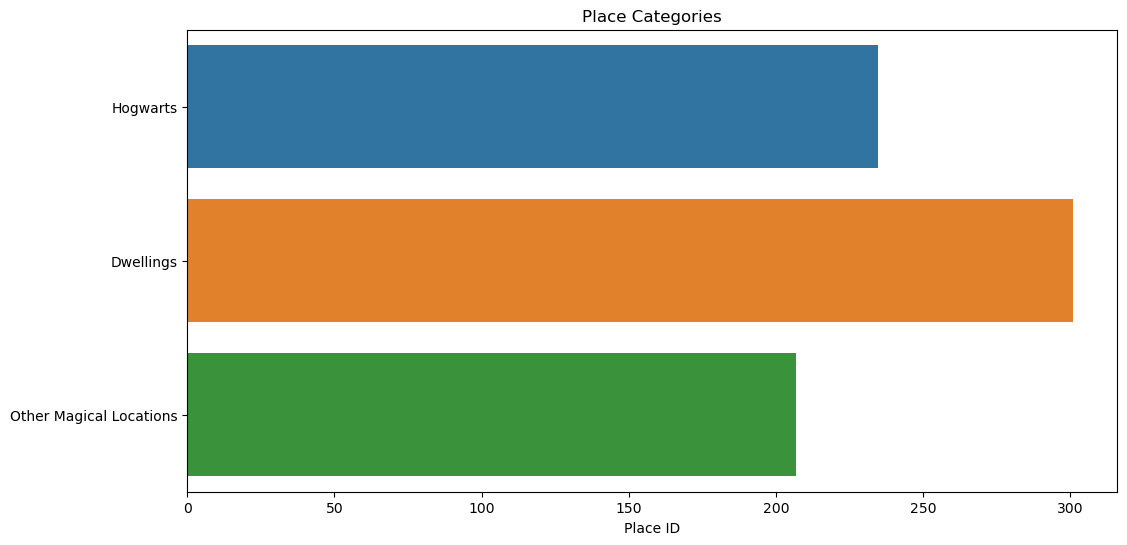

In [70]:
top_20_places=df_dialogue['Place ID'].value_counts()[:20]
indexes_list = list(top_20_places.index)
locations_list = [df_places.loc[x-1, 'Place Category'] for x in indexes_list]
top_20_places.index = locations_list
sns.barplot(y=top_20_places.index, x=top_20_places, ci=None).set_title('Place Categories');

In [71]:
df_places=df_places.rename(columns={'Place Name' : 'place_name'}, inplace=False)

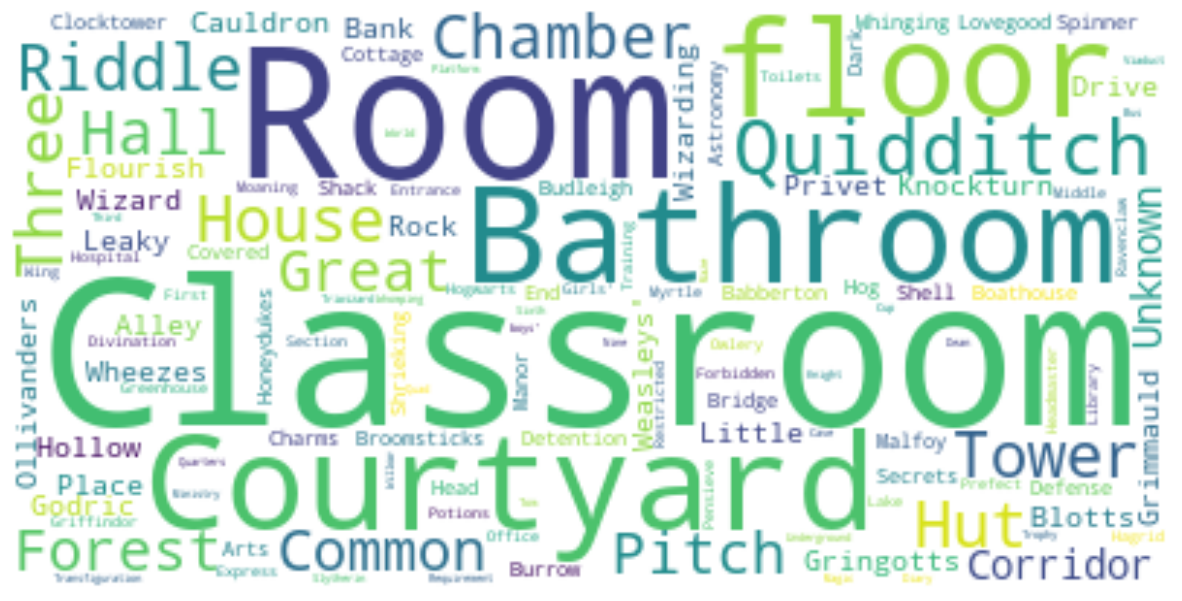

In [72]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator

text = " ".join(i for i in df_places.place_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### CHAPTERS

In [73]:
df_chapters.head(2)

Chapter ID         Chapter Name  Movie ID  Movie Chapter
0           1    Doorstep Delivery         1              1
1           2  The Vanishing Glass         1              2

In [74]:
df_chapters.isnull().sum()

Chapter ID       0
Chapter Name     0
Movie ID         0
Movie Chapter    0
dtype: int64

In [92]:
#drop the chapterid and movieid it's not important fo now

df_chapters=df_chapters.drop(['Chapter ID', 'Movie ID'], axis=1)
df_chapters.head()

Chapter Name  Movie Chapter
0    Doorstep Delivery              1
1  The Vanishing Glass              2
2  Letters from No One              3
3   Keeper of the Keys              4
4         Diagon Alley              5

In [93]:
df_chapters.shape

(234, 2)

In [94]:
df_chapters.nunique()

Chapter Name     232
Movie Chapter     40
dtype: int64

In [95]:
df_chapters = df_chapters.rename(columns={'Chapter Name' : 'chapter_name', 'Movie Chapter' : 'movie_chapter'}, inplace = False)

In [96]:
df_chapters.head()

chapter_name  movie_chapter
0    Doorstep Delivery              1
1  The Vanishing Glass              2
2  Letters from No One              3
3   Keeper of the Keys              4
4         Diagon Alley              5

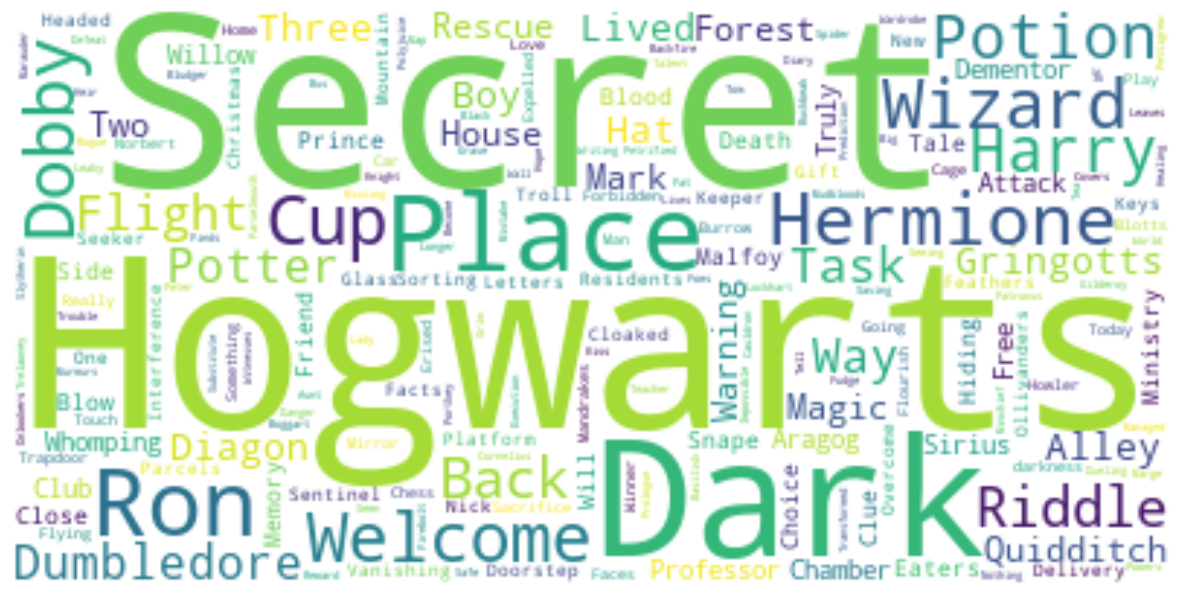

In [97]:
text = " ".join(i for i in df_chapters.chapter_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### SPELLS

In [98]:
df_spells.head(2)

ï»¿Spell ID Incantation          spell_name             Effect     Light
0            1       Accio     Summoning Charm  Summons an object       NaN
1            2   Aguamenti  Water-Making Spell     Conjures water  Icy blue

In [99]:
df_spells.isnull().sum()

ï»¿Spell ID     0
Incantation     0
spell_name      0
Effect          0
Light          21
dtype: int64

In [100]:
df_spells.dropna()

ï»¿Spell ID          Incantation                        spell_name  \
1             2            Aguamenti                Water-Making Spell   
2             3     Alarte Ascendare  Launch an object up into the air   
3             4            Alohomora                   Unlocking Charm   
4             5        Arania Exumai            Spider repelling spell   
6             7        Avada Kedavra                     Killing Curse   
8             9      Brackium Emendo                   Brackium Emendo   
9            10        Cistem Aperio                     Cistem Aperio   
11           12            Confringo                    Blasting Curse   
12           13               Crucio                   Cruciatus Curse   
13           14             Diffindo                    Severing Charm   
15           16             Engorgio                 Engorgement Charm   
17           18     Expecto Patronum                    Patronus Charm   
18           19         Expelliarmus                   Disarming Charm   
19           20              Expulso                     Expulso Curse   
20           21               Finite             General Counter-Spell   
22           23            Immobulus                    Freezing Charm   
23           24          Impedimenta                   Impediment Jinx   
26           27             Incendio                 Fire-Making Spell   
27           28           Levicorpus                        Levicorpus   
29           30     Locomotor Mortis                  Leg-Locker Curse   
30           31                Lumos               Wand-Lighting Charm   
31           32         Lumos Maxima                      Lumos Maxima   
32           33          Lumos Solem                 Lumos Solem Spell   
35           36            Obliviate                      Memory Charm   
39           40   Petrificus Totalus              Full Body-Bind Curse   
40           41  Piertotum Locomotor               Piertotum Locomotor   
41           42               Portus                            Portus   
42           43    Priori Incantatem                     Reverse Spell   
44           45       Protego Maxima                    Protego Maxima   
46           47              Reducio                   Shrinking Charm   
47           48             Relashio                    Revulsion Jinx   
50           51    Repello Muggletum            Muggle-Repelling Charm   
51           52              Revelio                     Revelio Charm   
52           53          Rictusempra                    Tickling Charm   
54           55         Salvio hexia                      Salvio hexia   
55           56         Sectumsempra                      Sectumsempra   
56           57         Serpensortia               Snake Summons Spell   
57           58              Stupefy                    Stunning Spell   
58           59           Vera Verto                        Vera Verto   
59           60      Vipera Evanesca             Snake-Vanishing Spell   

                                       Effect          Light  
1                              Conjures water       Icy blue  
2                       Rockets target upward            Red  
3                              Unlocks target           Blue  
4                              Repels spiders           Blue  
6                         Instantaneous death          Green  
8                                 Mends bones           Blue  
9                                Opens chests          White  
11                                  Explosion   Fiery Orange  
12                          Excruciating pain            Red  
13                               Cuts objects    Light green  
15                            Causes swelling       Icy blue  
17                 Conjures a spirit guardian         Silver  
18                        Disarms an opponent        Scarlet  
19                            Blows things up           Blue  
20             Terminate

In [101]:
df_spells.nunique()

ï»¿Spell ID    61
Incantation    61
spell_name     61
Effect         61
Light          17
dtype: int64

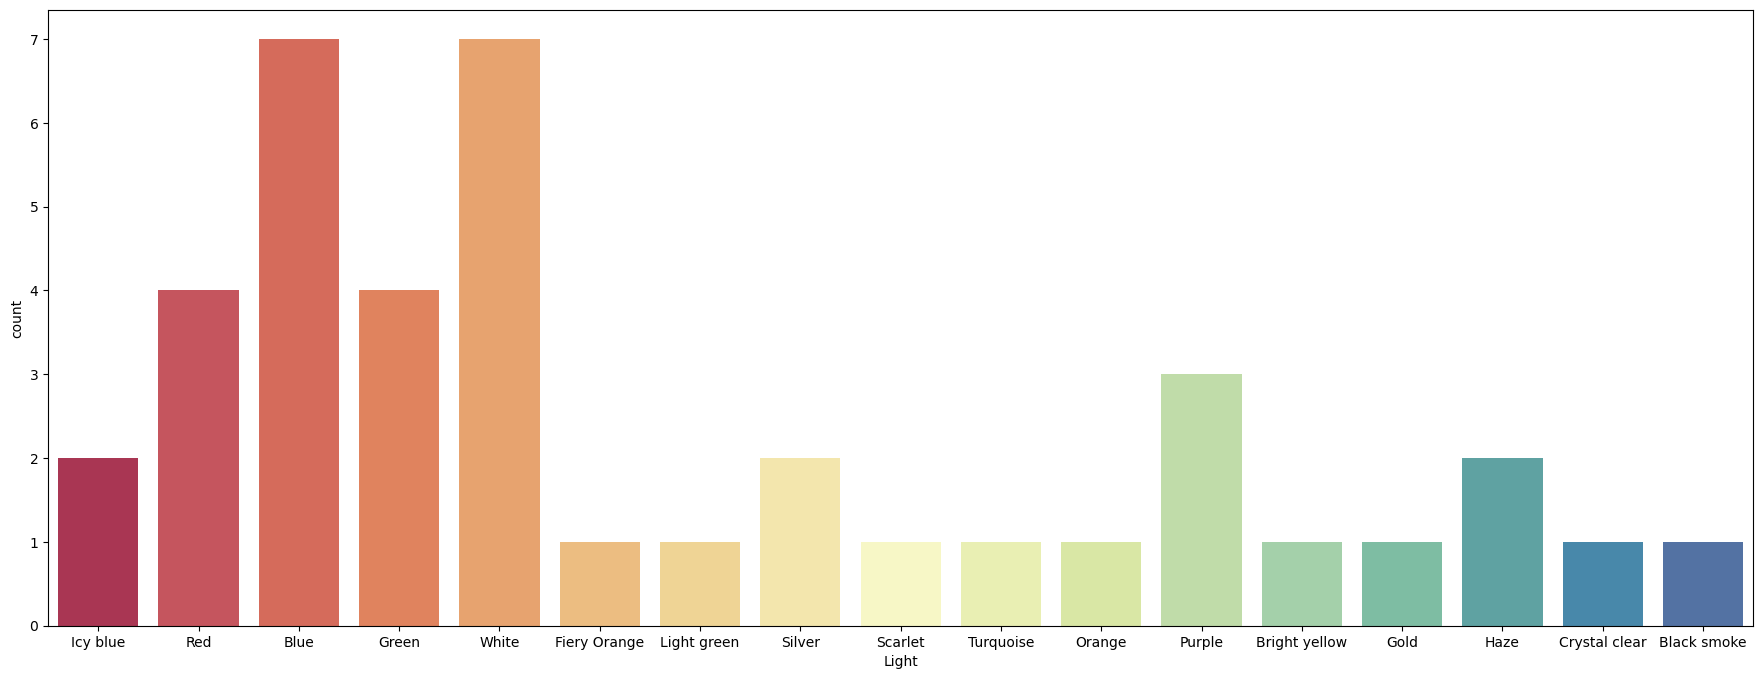

In [102]:
plt.figure(figsize=(22,8))
sns.countplot(x='Light', data=df_spells, palette="Spectral")
plt.show()

In [103]:
df_spells=df_spells.rename(columns={'Spell Name' : 'spell_name'}, inplace=False)

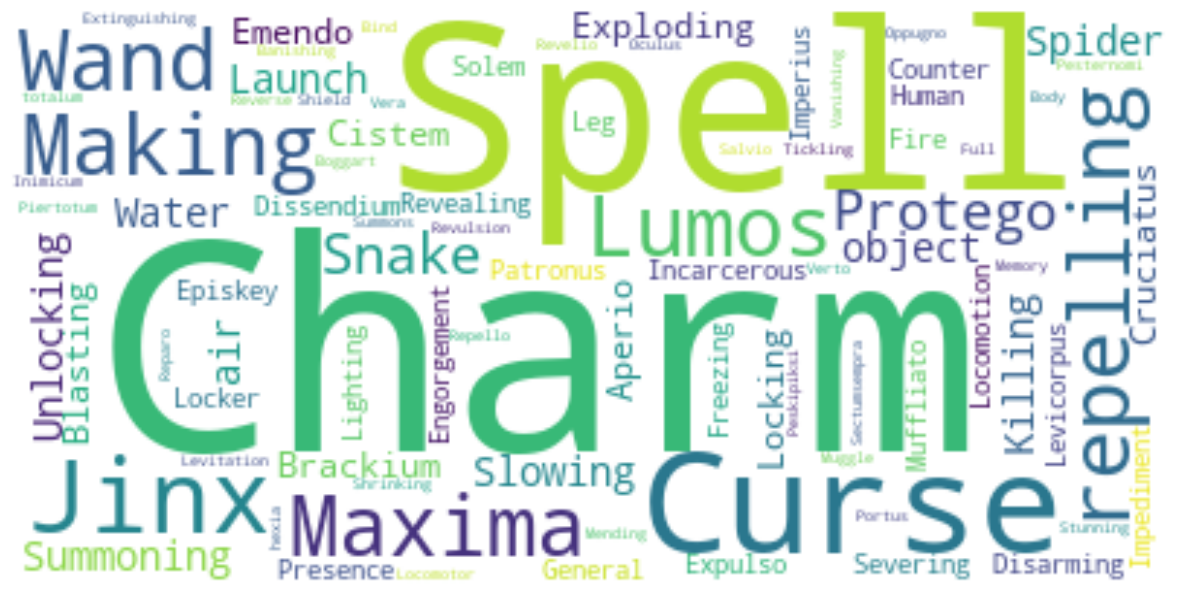

In [104]:
text = " ".join(i for i in df_spells.spell_name)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [105]:
df_spells.describe(include='all')

ï»¿Spell ID Incantation       spell_name             Effect Light
count     61.000000          61               61                 61    40
unique          NaN          61               61                 61    17
top             NaN       Accio  Summoning Charm  Summons an object  Blue
freq            NaN           1                1                  1     7
mean      31.000000         NaN              NaN                NaN   NaN
std       17.752934         NaN              NaN                NaN   NaN
min        1.000000         NaN              NaN                NaN   NaN
25%       16.000000         NaN              NaN                NaN   NaN
50%       31.000000         NaN              NaN                NaN   NaN
75%       46.000000         NaN              NaN                NaN   NaN
max       61.000000         NaN              NaN                NaN   NaN

### DATA DICTIONARY

In [106]:
#data dictionary
dic_data=pd.read_csv("Data_Dictionary.csv")
dic_data.head()

Table         Field                              Description
0  Movies      Movie ID         Unique identifier for each movie
1     NaN   Movie Title                          Full movie name
2     NaN  Release Year  Year the movie was released in theaters
3     NaN       Runtime           Length of the movie in minutes
4     NaN        Budget       Budget for the movie is US Dollars

In [107]:
dic_data.shape

(31, 3)

In [108]:
dic_data.isnull().sum()

Table          25
Field           0
Description     0
dtype: int64

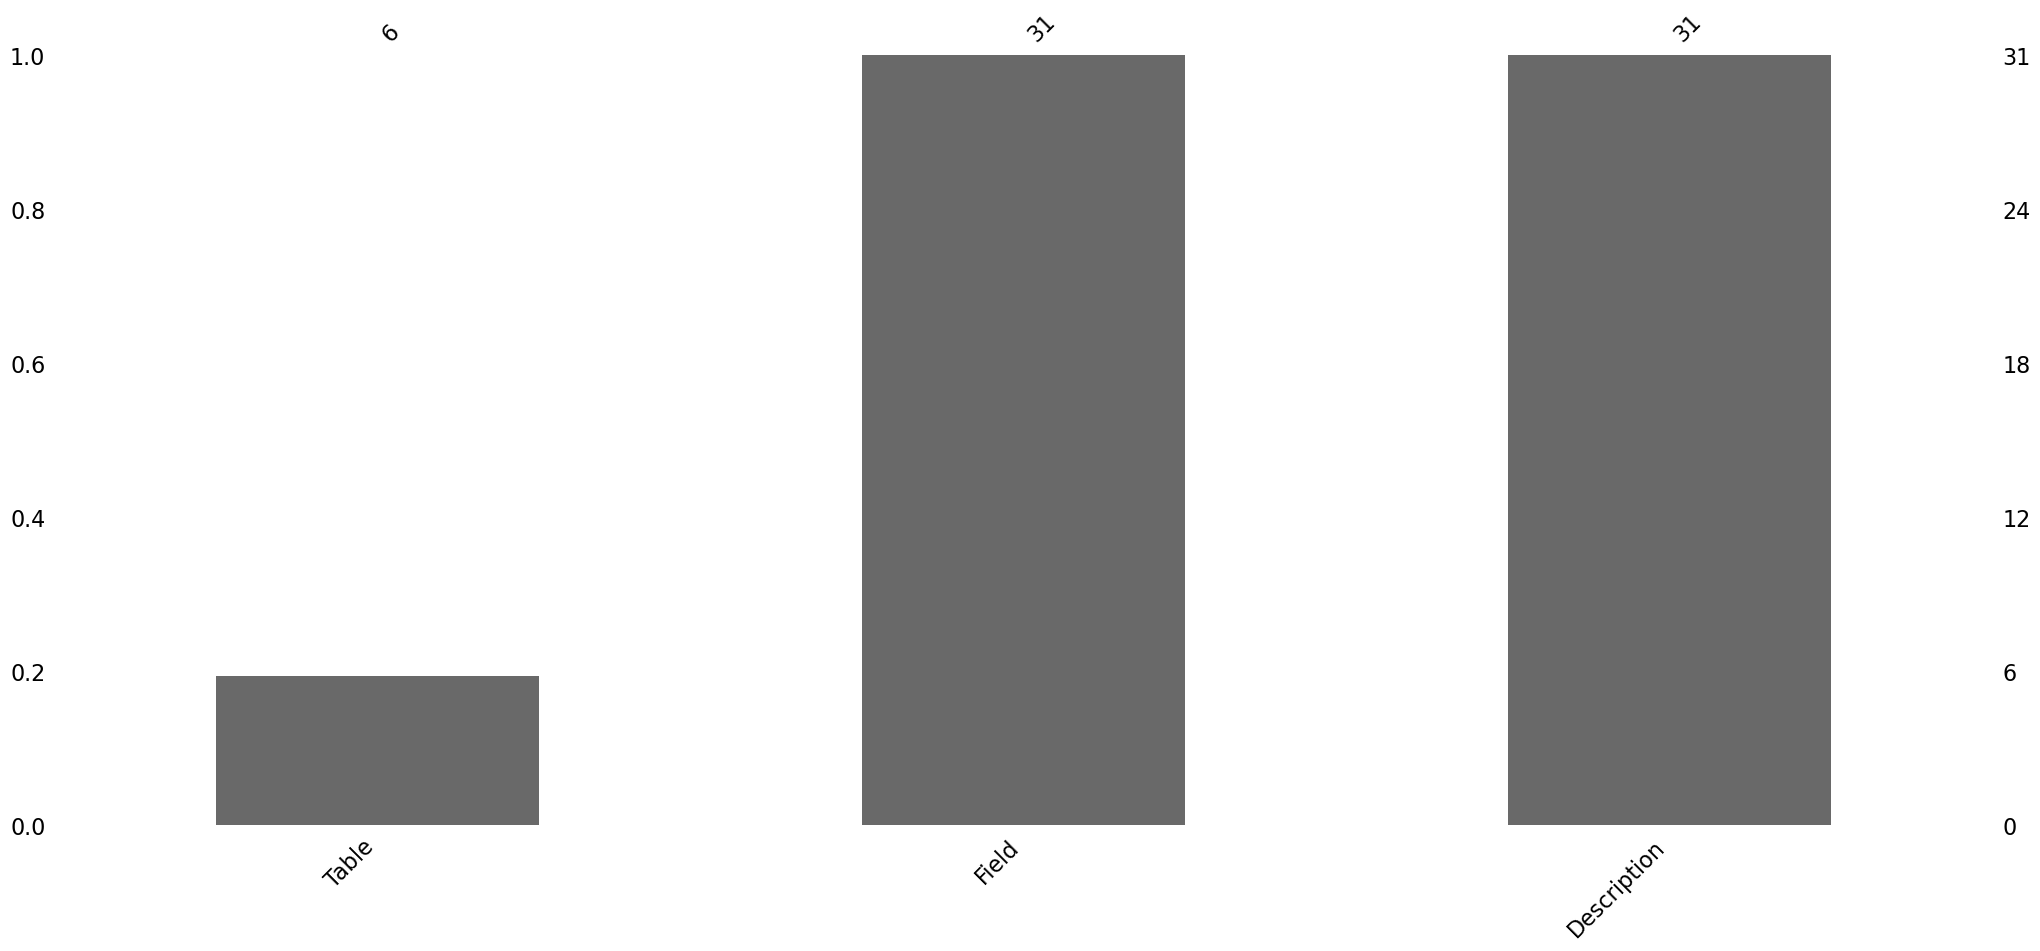

In [109]:
msno.bar(dic_data)
plt.show()

In [110]:
dic_data=dic_data.drop('Table',axis=1)

### DIALOGUE

In [111]:
#dialogue dataset
df_dialogue = pd.read_csv("Dialogue.csv", encoding='unicode_escape')

In [112]:
df_dialogue.head()

Dialogue ID  Chapter ID  Place ID  Character ID  \
0            1           1         8             4   
1            2           1         8             7   
2            3           1         8             4   
3            4           1         8             7   
4            5           1         8             4   

                                            Dialogue  
0  I should have known that you would be here...P...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

In [113]:
df_dialogue.isnull().sum()

Dialogue ID     0
Chapter ID      0
Place ID        0
Character ID    0
Dialogue        0
dtype: int64

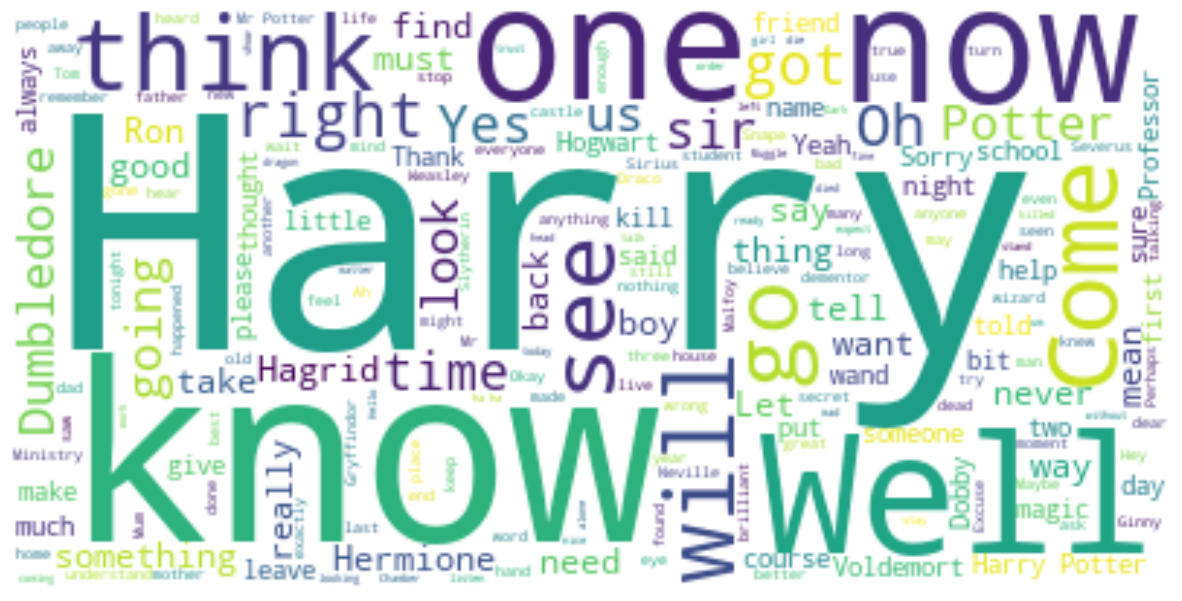

In [114]:
text = " ".join(i for i in df_dialogue.Dialogue)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Thank you